## Colab 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 라이브러리

In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# 프레젠테이션이나 보고서와 같은 다양한 매체에 활용할 수 있도록 스타일링
sns.set_context('notebook')

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

## 데이터 로드

In [5]:
base_path = "/content/drive/MyDrive/Datathon/archive"

In [76]:
paths = glob(f'{base_path}/*')
paths

['/content/drive/MyDrive/Datathon/archive/olist_customers_dataset.csv',
 '/content/drive/MyDrive/Datathon/archive/olist_order_reviews_dataset.csv',
 '/content/drive/MyDrive/Datathon/archive/olist_products_dataset.csv',
 '/content/drive/MyDrive/Datathon/archive/olist_order_items_dataset.csv',
 '/content/drive/MyDrive/Datathon/archive/olist_orders_dataset.csv',
 '/content/drive/MyDrive/Datathon/archive/olist_sellers_dataset.csv',
 '/content/drive/MyDrive/Datathon/archive/product_category_name_translation.csv',
 '/content/drive/MyDrive/Datathon/archive/olist_geolocation_dataset.csv',
 '/content/drive/MyDrive/Datathon/archive/olist_order_payments_dataset.csv']

In [77]:
customers = pd.read_csv(paths[0]) # olist_customers_dataset.csv
reviews = pd.read_csv(paths[1]) # olist_order_reviews_dataset.csv
products = pd.read_csv(paths[2]) # olist_products_dataset.csv
order_items = pd.read_csv(paths[3]) # olist_order_items_dataset.csv
orders = pd.read_csv(paths[4]) # olist_orders_dataset.csv
sellers = pd.read_csv(paths[5]) # olist_sellers_dataset.csv
product_category_name = pd.read_csv(paths[6]) # product_category_name_translation.csv
geolocation = pd.read_csv(paths[7]) # olist_geolocation_dataset.csv
order_payments = pd.read_csv(paths[8]) # olist_order_payments_dataset.csv

# ①orders에 ②customer 붙이기
df = orders.merge(customers, on = "customer_id", how = "outer")

# df에 ③payment 붙이기
df = df.merge(order_payments, on = "order_id", how = "outer")

# ④item과 ⑤products 붙이기
df = df.merge(order_items, on = "order_id", how = 'left')
df = df.merge(products, on = "product_id", how = 'outer')

# ⑥리뷰 붙이기
df = df.merge(reviews, on='order_id', how='outer')

# ⑦셀러 붙이기
df = df.merge(sellers, on='seller_id', how='outer')
display(df.shape, df.head(2))

(119143, 39)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP


- 각각의 주(state)가 속한 지역(region) 정보 넣기
> - 'cust_Region, seller_Region' 컬럼 만들기

In [9]:
# Seting regions
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

# customer
df.loc[df['customer_state'].isin(sudeste), 'cust_Region'] = 'Southeast'
df.loc[df['customer_state'].isin(nordeste), 'cust_Region'] = 'Northeast'
df.loc[df['customer_state'].isin(norte), 'cust_Region'] = 'North'
df.loc[df['customer_state'].isin(centro_oeste), 'cust_Region'] = 'Midwest'
df.loc[df['customer_state'].isin(sul), 'cust_Region'] = 'South'

# seller
df.loc[df['seller_state'].isin(sudeste), 'seller_Region'] = 'Southeast'
df.loc[df['seller_state'].isin(nordeste), 'seller_Region'] = 'Northeast'
df.loc[df['seller_state'].isin(norte), 'seller_Region'] = 'North'
df.loc[df['seller_state'].isin(centro_oeste), 'seller_Region'] = 'Midwest'
df.loc[df['seller_state'].isin(sul), 'seller_Region'] = 'South'

In [10]:
# 각 주(state)별 인구 데이터를 딕셔너리로 만들기
popularity = {'SP': 44408565.0,
 'SC': 6888735.0,
 'MG': 20686960.0,
 'PR': 11115240.0,
 'RJ': 16897675.0,
 'RS': 11134315.0,
 'PA': 8327560.0,
 'GO': 6712295.0,
 'ES': 3856255.0,
 'BA': 14603140.0,
 'MA': 6962630.0,
 'MS': 2683595.0,
 'CE': 8955790.0,
 'DF': 2887665.0,
 'RN': 3406450.0,
 'PE': 9329395.0,
 'MT': 3358115.0,
 'AM': 3950000.0,
 'AP': 794305.0,
 'AL': 3274675.0,
 'RO': 1708640.0,
 'PB': 3947955.0,
 'TO': 1519680.0,
 'PI': 3233145.0,
 'AC': 837940.0,
 'SE': 2233735.0,
 'RR': 564855.0}

# '고객이 거주하는 주의 인구수'라는 새로운 컬럼에 인구 데이터 넣기
df["고객이 거주하는 주의 인구수"] = df["customer_state"].apply(lambda x : popularity[x])
df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,cust_Region,seller_Region,고객이 거주하는 주의 인구수
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,Southeast,Southeast,44408565.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,Southeast,Southeast,44408565.0


In [11]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'cust_Region', 'seller_Region', '고객이 거주하는 주의 인구수'],
      dtype='object')

In [12]:
# 수요만 발생하고 있는 주(state)는 총 4곳이다.
set(df["customer_state"].unique()) - set(df["seller_state"].unique())

{'AL', 'AP', 'RR', 'TO'}

In [13]:
# 공급만 발생하고 있는 주(state)는 없다.
set(df["seller_state"].unique()) - set(df["customer_state"].unique())

{nan}

## 데이터 정제

In [14]:
# 날짜 타입 변경
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_approved_at"] = pd.to_datetime(df["order_approved_at"])
df["order_delivered_carrier_date"] = pd.to_datetime(df["order_delivered_carrier_date"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])

In [15]:
# 지역 컬럼 추가
df_customers_by_state = df.groupby(['cust_Region', 'customer_state'])[
    ['order_id', 'customer_unique_id', 'seller_id', 'payment_value']].agg({
    'order_id': 'nunique',
    'customer_unique_id': 'nunique',
    'seller_id': 'nunique',
    'payment_value': 'sum',
}).reset_index()

df_customers_by_state.columns = [
    '브라질 지역',
    '브라질 주',
    '주문 건수',
    '구매자 수',
    '판매자 수',
    '총 매출',
]

df_customers_by_state['주별 인구 수'] = \
    df_customers_by_state['브라질 주'].apply(lambda x: popularity[x])

den = df_customers_by_state['총 매출'].sum()
df_customers_by_state['주별 구매금액 총합 비율'] = \
    df_customers_by_state['총 매출'] / den * 100

df_customers_by_state

,브라질 지역,브라질 주,주문 건수,구매자 수,판매자 수,총 매출,주별 인구 수,주별 구매금액 총합 비율
0,Midwest,DF,2140,2075,786,438095.32,2887665.0,2.128778
1,Midwest,GO,2020,1952,724,520481.65,6712295.0,2.529107
2,Midwest,MS,715,694,404,167670.27,2683595.0,0.814738
3,Midwest,MT,907,876,465,257802.26,3358115.0,1.252704
4,North,AC,81,77,71,24984.86,837940.0,0.121406
5,North,AM,148,143,118,34956.93,3950000.0,0.169862
6,North,AP,68,67,63,21642.70,794305.0,0.105165
7,North,PA,975,949,465,263217.70,8327560.0,1.279018
8,North,RO,253,240,182,69184.48,1708640.0,0.336179
9,North,RR,46,45,39,12462.21,564855.0,0.060556


- '브라질 지역, 구매 건수' 기준으로 정렬

In [16]:
df_s = df_customers_by_state.sort_values(by=['브라질 지역', '주문 건수'],
                                  ascending=[False, False]).reset_index(drop=True)
df_s

,브라질 지역,브라질 주,주문 건수,구매자 수,판매자 수,총 매출,주별 인구 수,주별 구매금액 총합 비율
0,Southeast,SP,41746,40302,2549,7726078.35,44408565.0,37.542296
1,Southeast,RJ,12852,12384,1751,2795615.67,16897675.0,13.584360
2,Southeast,MG,11635,11259,1664,2351221.09,20686960.0,11.424973
3,Southeast,ES,2033,1964,738,408611.64,3856255.0,1.985512
4,South,RS,5466,5277,1232,1160175.66,11134315.0,5.637486
5,South,PR,5045,4882,1232,1079795.49,11115240.0,5.246905
6,South,SC,3637,3534,1038,801276.45,6888735.0,3.893535
7,Northeast,BA,3380,3277,967,805070.98,14603140.0,3.911973
8,Northeast,PE,1652,1609,638,380294.18,9329395.0,1.847912
9,Northeast,CE,1336,1313,528,349290.36,8955790.0,1.697260


## 구매 고객 수 시각화

### 브라질 5개 지역 기준

In [17]:
# 데이터 확인
df_s.groupby('브라질 지역')['구매자 수'].sum().sort_values(
    ascending=False).to_frame('구매 고객 수').reset_index()

,브라질 지역,구매 고객 수
0,Southeast,65909
1,South,13693
2,Northeast,9143
3,Midwest,5597
4,North,1794


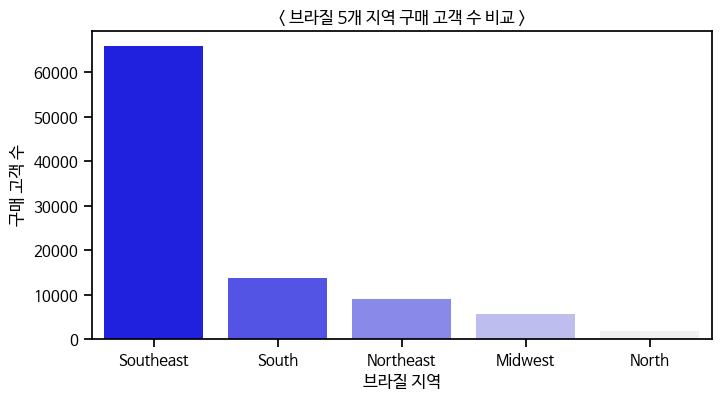

In [23]:
_, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.barplot(
    data= df_s.groupby('브라질 지역')['구매자 수'].sum().sort_values(
    ascending=False).to_frame('구매 고객 수').reset_index(),
    x='브라질 지역',
    y='구매 고객 수',
    palette='light:b_r',
)
ax.set_title('< 브라질 5개 지역 구매 고객 수 비교 >')
ax.set_ylabel('구매 고객 수');

### 브라질 5개 지역별 색상 달리해서 시각화

In [28]:
values = np.array(df_s['구매자 수'])
display(values)

idx = np.array(df_s['브라질 주'])
display(idx)

# sudeste - Southeast - blue
# nordeste - Northeast - green
# norte - North - C3
# centro_oeste - Midwest - C4
# sul - South - orange
col_palette = ['tab:blue' if x in sudeste else 'tab:green'\
                      if x in nordeste else 'C3'\
                      if x in norte else 'C4'\
                      if x in centro_oeste else 'tab:orange'\
                      if x in sul else 'black' for x in idx]
col_palette

array([40302, 12384, 11259,  1964,  5277,  4882,  3534,  3277,  1609,
        1313,   726,   519,   482,   474,   401,   342,   949,   273,
         240,   143,    77,    67,    45,  2075,  1952,   876,   694])

array(['SP', 'RJ', 'MG', 'ES', 'RS', 'PR', 'SC', 'BA', 'PE', 'CE', 'MA',
       'PB', 'PI', 'RN', 'AL', 'SE', 'PA', 'TO', 'RO', 'AM', 'AC', 'AP',
       'RR', 'DF', 'GO', 'MT', 'MS'], dtype=object)

['tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C4',
 'C4',
 'C4',
 'C4']

In [31]:
import matplotlib.patches as mpatches #범례 그리기 위한 라이브러리

# 범례 지정하기

variable_1 = mpatches.Patch(color='tab:blue',label='Southeast')
variable_2 = mpatches.Patch(color='tab:orange',label='South')
variable_3 = mpatches.Patch(color='tab:green', label='Northeast')
variable_4 = mpatches.Patch(color='C3',label='North')
variable_5 = mpatches.Patch(color='C4', label='Midwest')

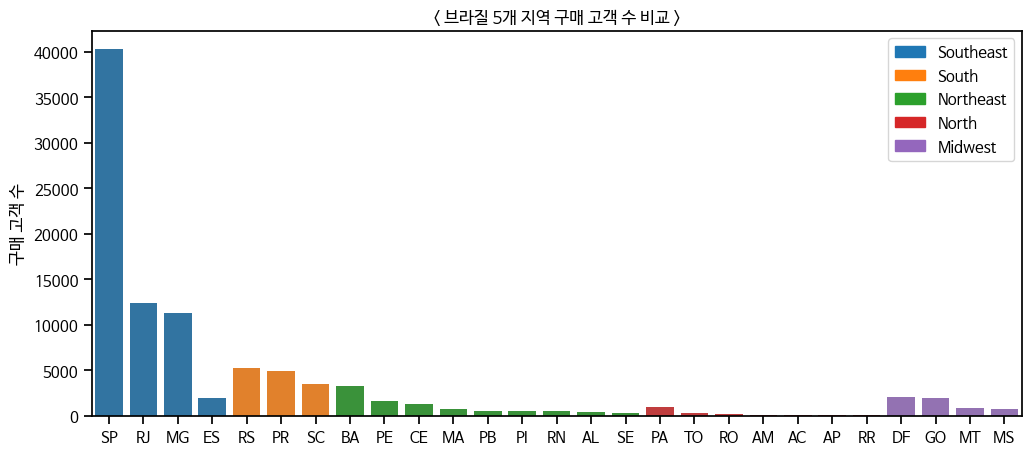

In [33]:
_, ax = plt.subplots(1, 1, figsize=(12, 5))
ax = sns.barplot(x=idx, y=values, palette=col_palette)

ax.set_title('< 브라질 5개 지역 구매 고객 수 비교 >')
ax.set_ylabel('구매 고객 수')

# 범례 나타내기
ax.legend(handles=[variable_1, variable_2, variable_3, variable_4, variable_5,],
          loc='upper right');

### 두 개의 그래프 한 곳에 모아보기
- SP(상파울로 주)가 포함된 Southeast 지역의 고객 수가 가장 많고,
- 그 다음으로 South 지역의 고객 수가 많다.

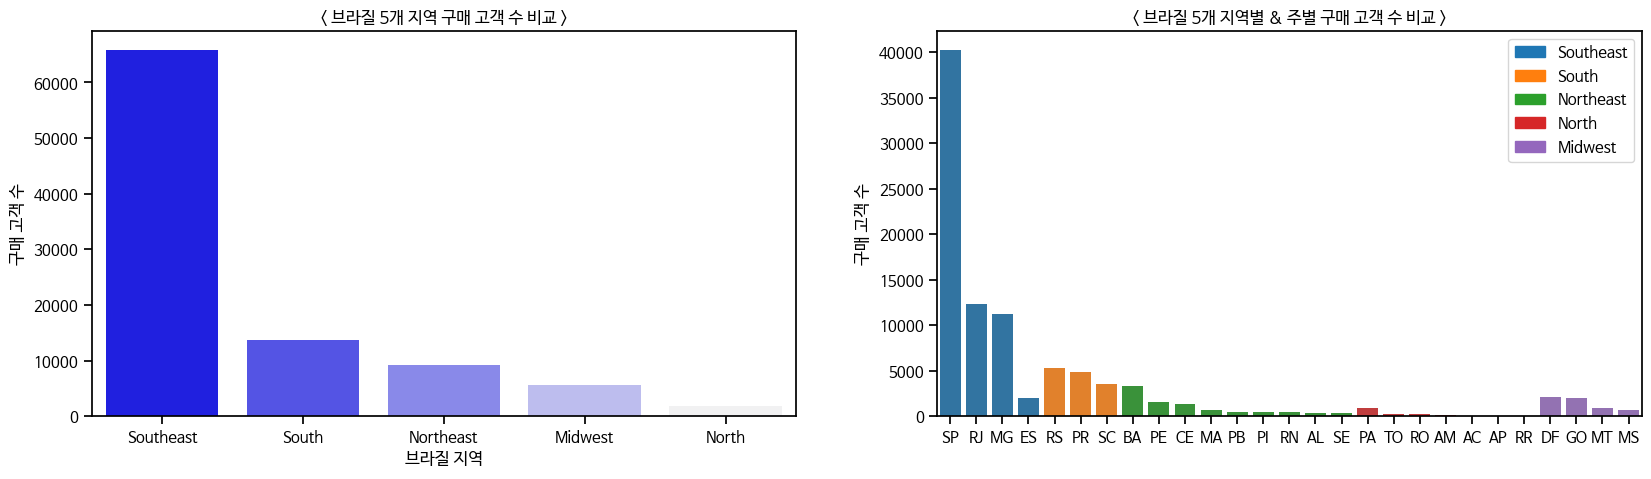

In [34]:
_, axes = plt.subplots(1, 2, figsize=(20, 5)) # nrows=1, ncols=2

sns.barplot(
    data= df_s.groupby('브라질 지역')['구매자 수'].sum().sort_values(
    ascending=False).to_frame('구매 고객 수').reset_index(),
    x='브라질 지역',
    y='구매 고객 수',
    palette='light:b_r',
    ax=axes[0]
)
axes[0].set_title('< 브라질 5개 지역 구매 고객 수 비교 >')
axes[0].set_ylabel('구매 고객 수')

sns.barplot(x=idx, y=values, palette=col_palette,
            ax=axes[1])

axes[1].set_title('< 브라질 5개 지역별 & 주별 구매 고객 수 비교 >')
axes[1].set_ylabel('구매 고객 수')

# 범례 나타내기
axes[1].legend(handles=[variable_1, variable_2, variable_3, variable_4, variable_5,],
          loc='upper right');

## 판매자 수 시각화

### 브라질 5개 지역 기준

In [36]:
# 데이터 확인
df_s.groupby('브라질 지역')['판매자 수'].sum().sort_values(
    ascending=False).to_frame('판매자 수').reset_index()

,브라질 지역,판매자 수
0,Southeast,6702
1,Northeast,3847
2,South,3502
3,Midwest,2379
4,North,1137


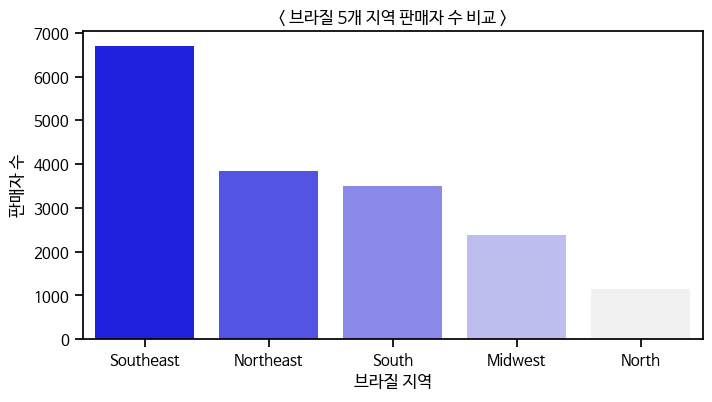

In [38]:
_, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.barplot(
    data= df_s.groupby('브라질 지역')['판매자 수'].sum().sort_values(
    ascending=False).to_frame('판매자 수').reset_index(),
    x='브라질 지역',
    y='판매자 수',
    palette='light:b_r',
)
ax.set_title('< 브라질 5개 지역 판매자 수 비교 >')
ax.set_ylabel('판매자 수');

### 브라질 5개 지역별 색상 달리해서 시각화

In [39]:
sellers = np.array(df_s['판매자 수'])
display(sellers)

idx = np.array(df_s['브라질 주'])
display(idx)

# sudeste - Southeast - blue
# nordeste - Northeast - green
# norte - North - C3
# centro_oeste - Midwest - C4
# sul - South - orange
col_palette = ['tab:blue' if x in sudeste else 'tab:green'\
                      if x in nordeste else 'C3'\
                      if x in norte else 'C4'\
                      if x in centro_oeste else 'tab:orange'\
                      if x in sul else 'black' for x in idx]
col_palette

array([2549, 1751, 1664,  738, 1232, 1232, 1038,  967,  638,  528,  375,
        303,  297,  275,  252,  212,  465,  199,  182,  118,   71,   63,
         39,  786,  724,  465,  404])

array(['SP', 'RJ', 'MG', 'ES', 'RS', 'PR', 'SC', 'BA', 'PE', 'CE', 'MA',
       'PB', 'PI', 'RN', 'AL', 'SE', 'PA', 'TO', 'RO', 'AM', 'AC', 'AP',
       'RR', 'DF', 'GO', 'MT', 'MS'], dtype=object)

['tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C4',
 'C4',
 'C4',
 'C4']

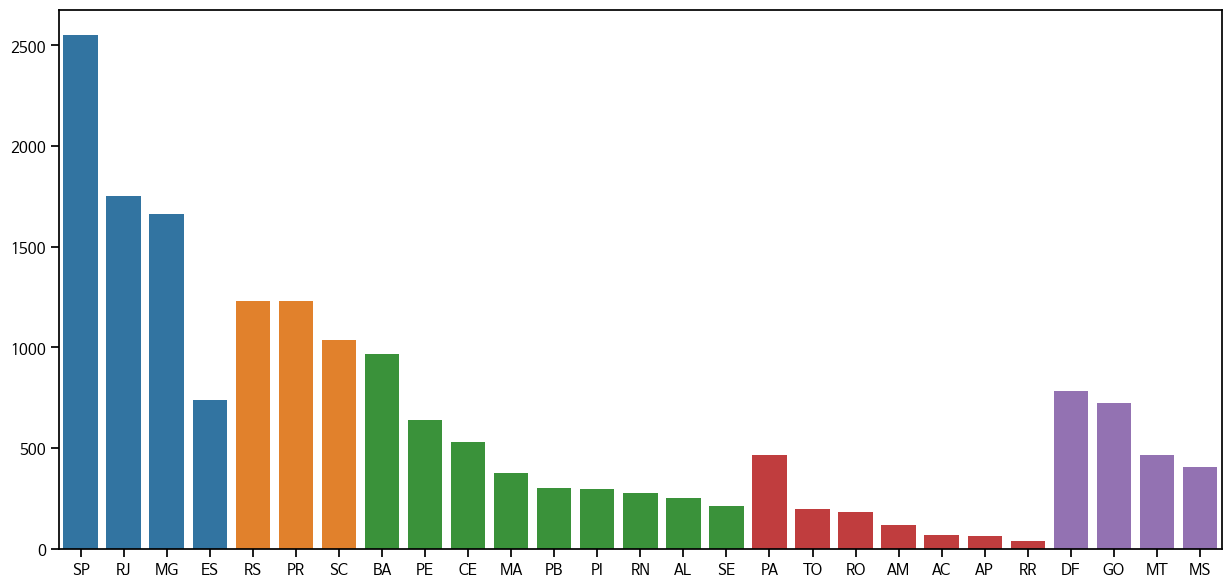

In [40]:
plt.figure(figsize=(15,7))
sns.barplot(x=idx, y=sellers, palette=col_palette,
            );

### 두 개의 그래프 한 곳에 모아보기
- SP(상파울로 주)가 포함된 Southeast 지역의 판매자 수가 가장 많고,
- 그 다음으로 South 지역의 판매자 수가 많다.

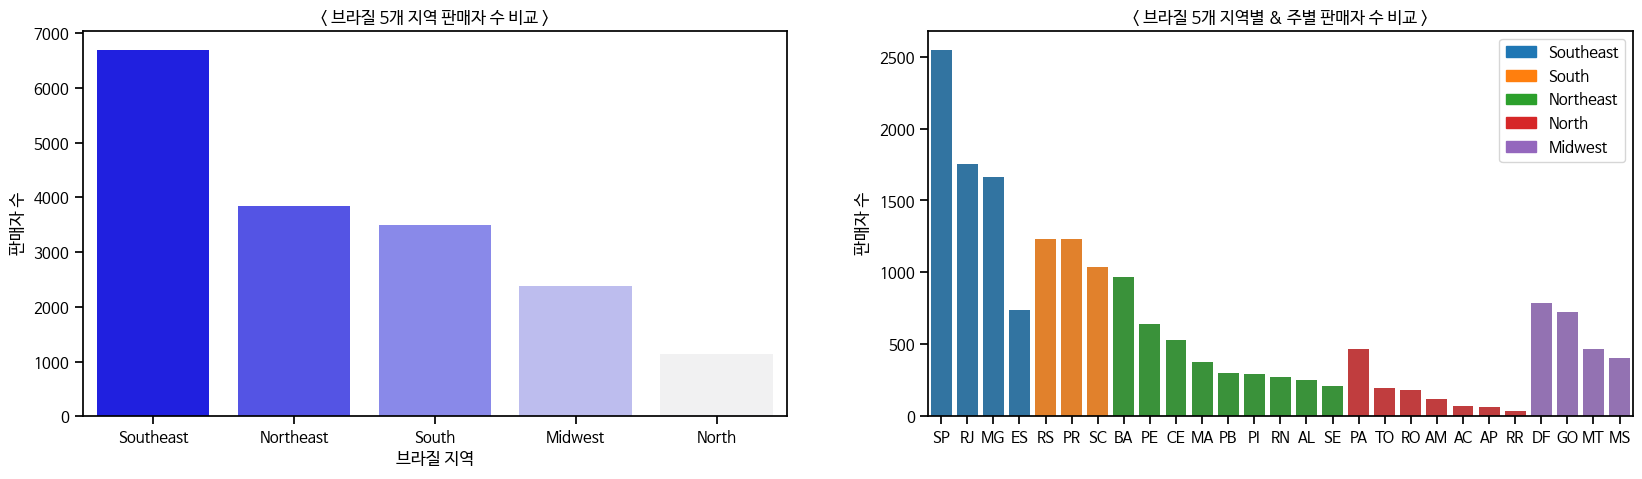

In [41]:
_, axes = plt.subplots(1, 2, figsize=(20, 5)) # nrows=1, ncols=2

sns.barplot(
    data= df_s.groupby('브라질 지역')['판매자 수'].sum().sort_values(
    ascending=False).to_frame('판매자 수').reset_index(),
    x='브라질 지역',
    y='판매자 수',
    palette='light:b_r',
    ax=axes[0]
)
axes[0].set_title('< 브라질 5개 지역 판매자 수 비교 >')
axes[0].set_ylabel('판매자 수')

sns.barplot(x=idx, y=sellers, palette=col_palette,
            ax=axes[1])

axes[1].set_title('< 브라질 5개 지역별 & 주별 판매자 수 비교 >')
axes[1].set_ylabel('판매자 수')

# 범례 나타내기
axes[1].legend(handles=[variable_1, variable_2, variable_3, variable_4, variable_5,],
          loc='upper right');

## 총 매출 시각화

### 브라질 5개 지역 기준

In [43]:
# 데이터 확인
df_s.groupby('브라질 지역')['총 매출'].sum().sort_values(
    ascending=False).to_frame('총 매출').reset_index()

,브라질 지역,총 매출
0,Southeast,13281526.75
1,South,3041247.60
2,Northeast,2373979.20
3,Midwest,1384049.50
4,North,498860.96


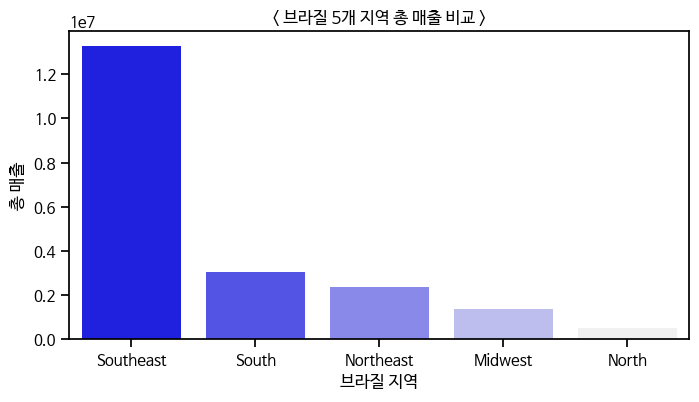

In [45]:
_, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.barplot(
    data= df_s.groupby('브라질 지역')['총 매출'].sum().sort_values(
    ascending=False).to_frame('총 매출').reset_index(),
    x='브라질 지역',
    y='총 매출',
    palette='light:b_r',
)
ax.set_title('< 브라질 5개 지역 총 매출 비교 >')
ax.set_ylabel('총 매출');

### 브라질 5개 지역별 색상 달리해서 시각화

In [46]:
sales = np.array(df_s['총 매출'])
display(sales)

idx = np.array(df_s['브라질 주'])
display(idx)

# sudeste - Southeast - blue
# nordeste - Northeast - green
# norte - North - C3
# centro_oeste - Midwest - C4
# sul - South - orange
col_palette = ['tab:blue' if x in sudeste else 'tab:green'\
                      if x in nordeste else 'C3'\
                      if x in norte else 'C4'\
                      if x in centro_oeste else 'tab:orange'\
                      if x in sul else 'black' for x in idx]
col_palette

array([7726078.35, 2795615.67, 2351221.09,  408611.64, 1160175.66,
       1079795.49,  801276.45,  805070.98,  380294.18,  349290.36,
        200363.24,  181660.73,  137158.89,  117192.91,  112296.47,
         90651.44,  263217.7 ,   72412.08,   69184.48,   34956.93,
         24984.86,   21642.7 ,   12462.21,  438095.32,  520481.65,
        257802.26,  167670.27])

array(['SP', 'RJ', 'MG', 'ES', 'RS', 'PR', 'SC', 'BA', 'PE', 'CE', 'MA',
       'PB', 'PI', 'RN', 'AL', 'SE', 'PA', 'TO', 'RO', 'AM', 'AC', 'AP',
       'RR', 'DF', 'GO', 'MT', 'MS'], dtype=object)

['tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C4',
 'C4',
 'C4',
 'C4']

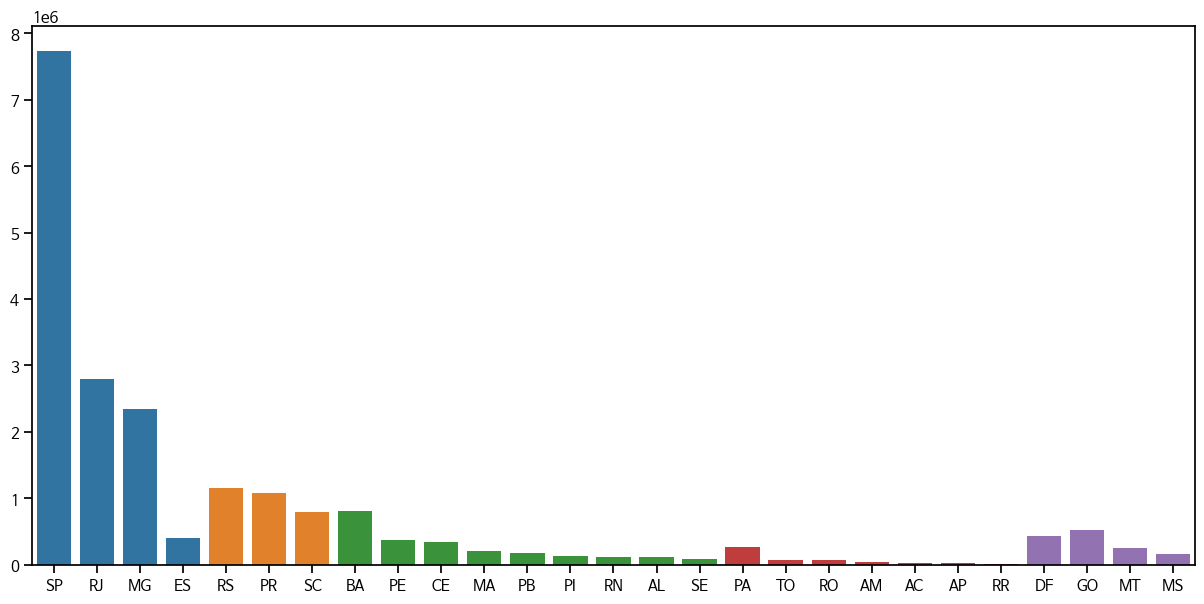

In [47]:
plt.figure(figsize=(15,7))
sns.barplot(x=idx, y=sales, palette=col_palette,
            );

### 두 개의 그래프 한 곳에 모아보기
- SP(상파울로 주)가 포함된 Southeast 지역의 총 매출이 가장 많고,
- 그 다음으로 South 지역이 따른다.

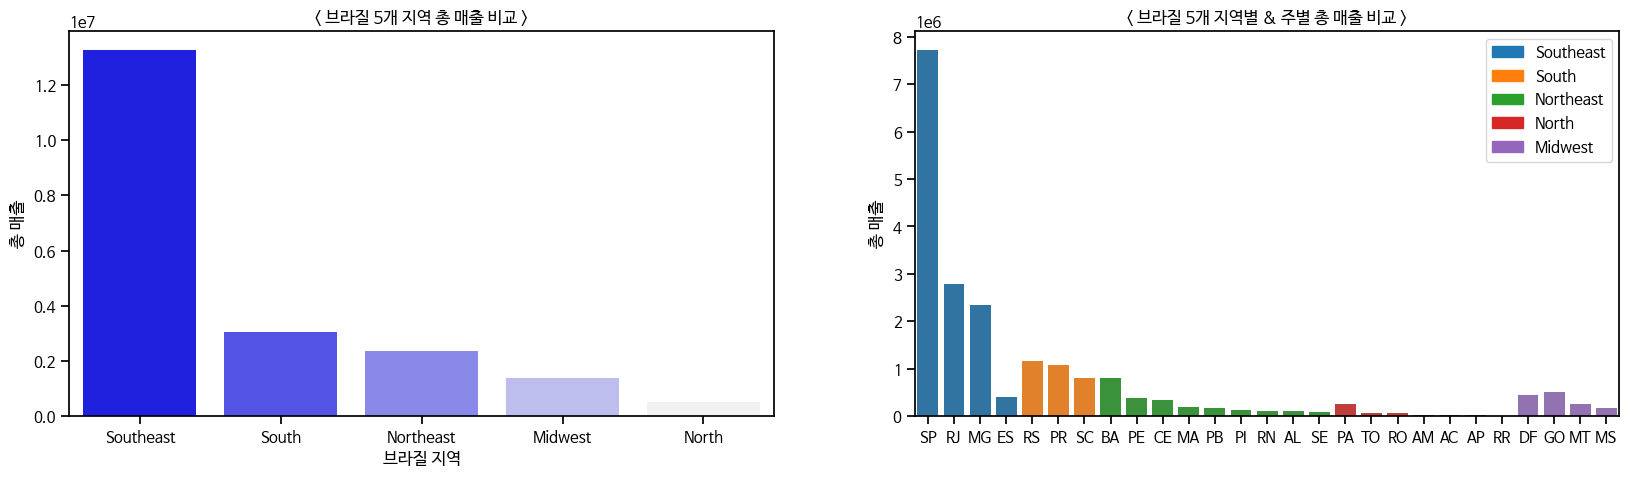

In [48]:
_, axes = plt.subplots(1, 2, figsize=(20, 5)) # nrows=1, ncols=2

sns.barplot(
    data= df_s.groupby('브라질 지역')['총 매출'].sum().sort_values(
    ascending=False).to_frame('총 매출').reset_index(),
    x='브라질 지역',
    y='총 매출',
    palette='light:b_r',
    ax=axes[0]
)
axes[0].set_title('< 브라질 5개 지역 총 매출 비교 >')
axes[0].set_ylabel('총 매출')

sns.barplot(x=idx, y=sales, palette=col_palette,
            ax=axes[1])

axes[1].set_title('< 브라질 5개 지역별 & 주별 총 매출 비교 >')
axes[1].set_ylabel('총 매출')

# 범례 나타내기
axes[1].legend(handles=[variable_1, variable_2, variable_3, variable_4, variable_5,],
          loc='upper right');

## ※ 결론
① SP(상파울로 주)가 있는 Southeast 지역이 가장 시장이 활성화 되어 있다.
- 브라질 5개 지역별 & 27개 주별 구매자 수, 판매자 수, 총 매출 기준.

② Southeast 지역 다음으로, South 지역이 활성화된 시장이다.
- South 지역 중에서도 유망한 주(state)와 도시를 찾아보자.

## ①의 시장 활성화 원인 파악
① SP(상파울로 주)가 있는 Southeast 지역이 가장 시장이 활성화 되어 있다.
- 브라질 5개 지역별 & 27개 주별 구매자 수, 판매자 수, 총 매출 기준.

### 가설1 : SP주는 판매자 당 구매자 비율이 가장 높을 것이다.
- `판매자 당 구매자 비율이 높다`는 것은 `한 명의 판매자가 더 많은 수요를 가질 수 있다`는 것이라 판단.

In [49]:
df_cp = df_s.copy()

In [51]:
# 판매자 당 구매자 비율
df_cp["판매자당구매자비율"] = df_cp["구매자 수"] / df_cp["판매자 수"]

# 구매자 당 판매자 비율
# df_cp['구매자당판매자비율'] = df_cp['판매자 수'] / df_cp['구매자 수']

df_cp.head(2)

,브라질 지역,브라질 주,주문 건수,구매자 수,판매자 수,총 매출,주별 인구 수,주별 구매금액 총합 비율,판매자당구매자비율
0,Southeast,SP,41746,40302,2549,7726078.35,44408565.0,37.542296,15.810906
1,Southeast,RJ,12852,12384,1751,2795615.67,16897675.0,13.584360,7.072530


In [52]:
df_cp.groupby(['브라질 지역', '판매자당구매자비율'])['총 매출'].sum().to_frame(
    '총 매출').reset_index().sort_values(by=['브라질 지역', '판매자당구매자비율'],
                                      ascending=[False, False])

,브라질 지역,판매자당구매자비율,총 매출
26,Southeast,15.810906,7726078.35
25,Southeast,7.072530,2795615.67
24,Southeast,6.766226,2351221.09
23,Southeast,2.661247,408611.64
22,South,4.283279,1160175.66
21,South,3.962662,1079795.49
20,South,3.404624,801276.45
19,Northeast,3.388831,805070.98
18,Northeast,2.521944,380294.18
17,Northeast,2.486742,349290.36


In [53]:
df_sort = df_cp.sort_values(by=['브라질 지역', '브라질 주', '판매자당구매자비율'],
                  ascending=[False, False, False])

In [54]:
sell_per_cust = np.array(df_sort['판매자당구매자비율'])
display(sell_per_cust)

idx = np.array(df_cp['브라질 주'])
display(idx)

# sudeste - Southeast - blue
# nordeste - Northeast - green
# norte - North - C3
# centro_oeste - Midwest - C4
# sul - South - orange
col_palette = ['tab:blue' if x in sudeste else 'tab:green'\
                      if x in nordeste else 'C3'\
                      if x in norte else 'C4'\
                      if x in centro_oeste else 'tab:orange'\
                      if x in sul else 'black' for x in idx]
col_palette

array([15.81090624,  7.07252998,  6.76622596,  2.66124661,  3.40462428,
        4.28327922,  3.96266234,  1.61320755,  1.72363636,  1.62289562,
        2.52194357,  1.71287129,  1.936     ,  2.48674242,  3.38883144,
        1.59126984,  1.3718593 ,  1.15384615,  1.31868132,  2.04086022,
        1.06349206,  1.21186441,  1.08450704,  1.88387097,  1.71782178,
        2.6961326 ,  2.63994911])

array(['SP', 'RJ', 'MG', 'ES', 'RS', 'PR', 'SC', 'BA', 'PE', 'CE', 'MA',
       'PB', 'PI', 'RN', 'AL', 'SE', 'PA', 'TO', 'RO', 'AM', 'AC', 'AP',
       'RR', 'DF', 'GO', 'MT', 'MS'], dtype=object)

['tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C4',
 'C4',
 'C4',
 'C4']

- `판매자 당 구매자 비율`은 SP주의 시장 활성화 원인을 설명하지 못한다.
- Southeast 지역에서 RJ주가 가장 높은 `판매자 당 구매자 비율`을 나타내기 때문이다.

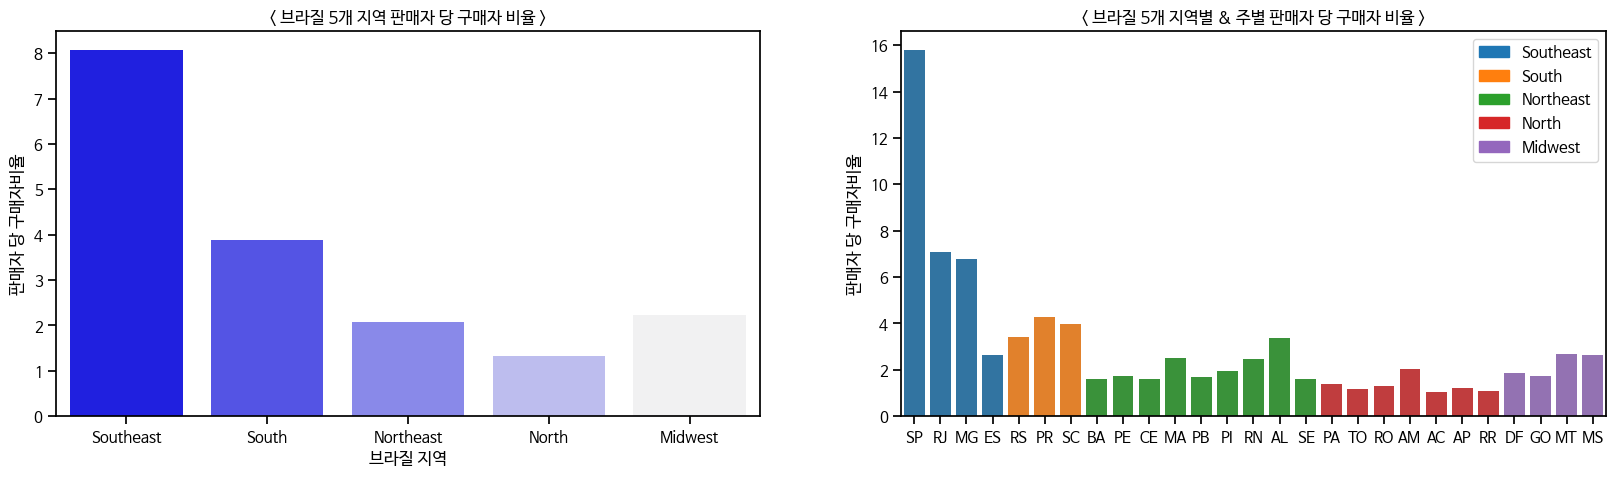

In [55]:
_, axes = plt.subplots(1, 2, figsize=(20, 5)) # nrows=1, ncols=2

sns.barplot(
    data= df_cp.groupby(['브라질 지역', '판매자당구매자비율'])['총 매출'].sum().to_frame(
    '총 매출').reset_index().sort_values(by=['브라질 지역', '판매자당구매자비율'],
                                      ascending=[False, False]),
    x='브라질 지역',
    y='판매자당구매자비율',
    palette='light:b_r',
    errorbar=None,
    ax=axes[0]
)
axes[0].set_title('< 브라질 5개 지역 판매자 당 구매자 비율 >')
axes[0].set_ylabel('판매자 당 구매자비율')

sns.barplot(x=idx, y=sell_per_cust, palette=col_palette,
            ax=axes[1])

axes[1].set_title('< 브라질 5개 지역별 & 주별 판매자 당 구매자 비율 >')
axes[1].set_ylabel('판매자 당 구매자비율')

# 범례 나타내기
axes[1].legend(handles=[variable_1, variable_2, variable_3, variable_4, variable_5,],
          loc='upper right');

### 가설2 : SP주는 객단가가 높을 것이다.
- 매출액 : 방문자수 X 전환율 X 객단가

In [56]:
# 객단가: 매출액 / 주문건수
# 구매 고객 중 고객 한명 당 구매 금액
df_cp['객단가'] = df_cp['총 매출']/df_cp['주문 건수']
df_cp = df_cp.sort_values(by=['브라질 지역', '객단가'], ascending=[False,False])
df_cp

,브라질 지역,브라질 주,주문 건수,구매자 수,판매자 수,총 매출,주별 인구 수,주별 구매금액 총합 비율,판매자당구매자비율,객단가
1,Southeast,RJ,12852,12384,1751,2795615.67,16897675.0,13.584360,7.072530,217.523784
2,Southeast,MG,11635,11259,1664,2351221.09,20686960.0,11.424973,6.766226,202.081744
3,Southeast,ES,2033,1964,738,408611.64,3856255.0,1.985512,2.661247,200.989493
0,Southeast,SP,41746,40302,2549,7726078.35,44408565.0,37.542296,15.810906,185.073500
6,South,SC,3637,3534,1038,801276.45,6888735.0,3.893535,3.404624,220.312469
5,South,PR,5045,4882,1232,1079795.49,11115240.0,5.246905,3.962662,214.032803
4,South,RS,5466,5277,1232,1160175.66,11134315.0,5.637486,4.283279,212.253139
11,Northeast,PB,536,519,303,181660.73,3947955.0,0.882720,1.712871,338.919272
12,Northeast,PI,495,482,297,137158.89,3233145.0,0.666478,1.622896,277.088667
14,Northeast,AL,413,401,252,112296.47,3274675.0,0.545667,1.591270,271.904286


In [57]:
df_cp.groupby(['브라질 지역', '객단가'])['총 매출'].sum().to_frame(
    '총 매출').reset_index().sort_values(by= ['브라질 지역', '객단가'],
    ascending=[False, False])

,브라질 지역,객단가,총 매출
26,Southeast,217.523784,2795615.67
25,Southeast,202.081744,2351221.09
24,Southeast,200.989493,408611.64
23,Southeast,185.073500,7726078.35
22,South,220.312469,801276.45
21,South,214.032803,1079795.49
20,South,212.253139,1160175.66
19,Northeast,338.919272,181660.73
18,Northeast,277.088667,137158.89
17,Northeast,271.904286,112296.47


In [58]:
unit_price = np.array(df_cp['객단가'])
display(unit_price)

idx = np.array(df_cp['브라질 주'])
display(idx)

# sudeste - Southeast - blue
# nordeste - Northeast - green
# norte - North - C3
# centro_oeste - Midwest - C4
# sul - South - orange
col_palette = ['tab:blue' if x in sudeste else 'tab:green'\
                      if x in nordeste else 'C3'\
                      if x in norte else 'C4'\
                      if x in centro_oeste else 'tab:orange'\
                      if x in sul else 'black' for x in idx]
col_palette

array([217.52378385, 202.08174388, 200.98949336, 185.07350046,
       220.31246907, 214.03280278, 212.25313941, 338.91927239,
       277.08866667, 271.90428571, 268.2238822 , 261.44488024,
       259.00411429, 241.63486598, 238.18668047, 230.20228814,
       318.275     , 308.45506173, 273.45644269, 270.9176087 ,
       269.96687179, 258.61457143, 236.19547297, 284.23622933,
       257.66418317, 234.50387413, 204.71743925])

array(['RJ', 'MG', 'ES', 'SP', 'SC', 'PR', 'RS', 'PB', 'PI', 'AL', 'MA',
       'CE', 'SE', 'RN', 'BA', 'PE', 'AP', 'AC', 'RO', 'RR', 'PA', 'TO',
       'AM', 'MT', 'GO', 'MS', 'DF'], dtype=object)

['tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C4',
 'C4',
 'C4',
 'C4']

- `SP주는 객단가가 높을 것이다.`라는 가설은 성립하지 않는다.
- Southeast 지역의 RJ주가 가장 높은 객단가를 보이기 때문이다.
- SP주는 Southeast 지역 중에서 매출액이 가장 높게 나타나는데, `매출액 : 방문자수 X 전환율 X 객단가` 중에서 '방문자수, 전환율'은 주어진 데이터 내에서 확인이 불가능하다는 한계가 있다.

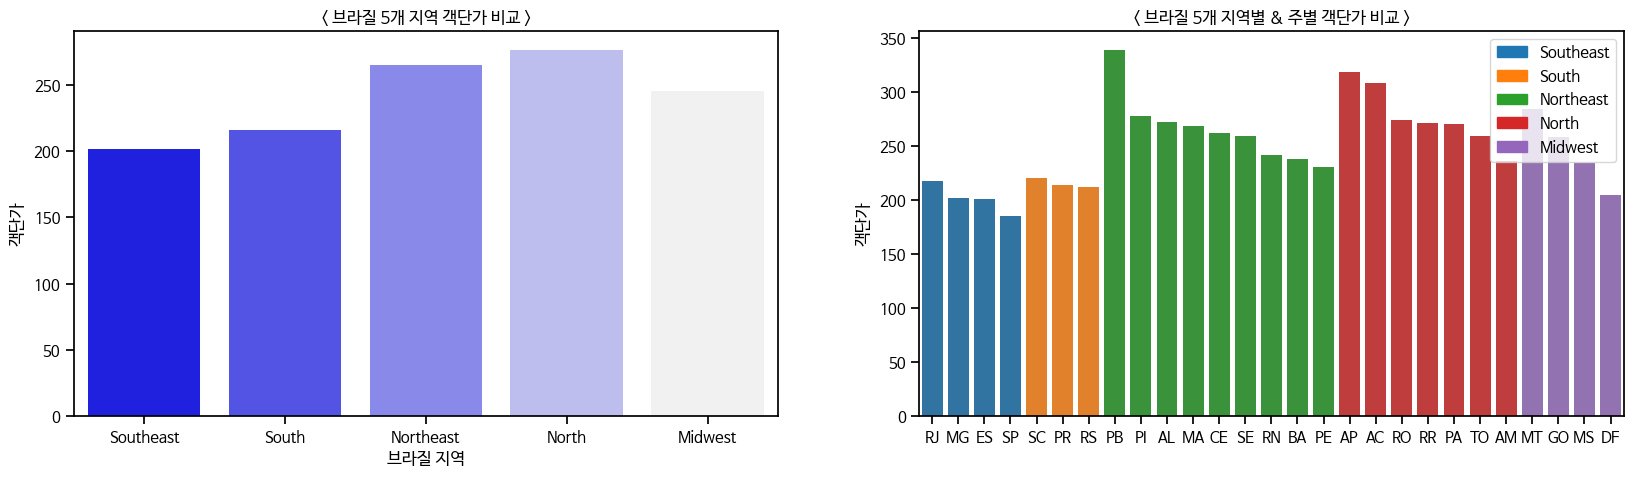

In [59]:
_, axes = plt.subplots(1, 2, figsize=(20, 5)) # nrows=1, ncols=2

sns.barplot(
    data= df_cp.groupby(['브라질 지역', '객단가'])['총 매출'].sum().to_frame(
    '총 매출').reset_index().sort_values(by= ['브라질 지역', '객단가'],
    ascending=[False, False]),
    x='브라질 지역',
    y='객단가',
    palette='light:b_r',
    errorbar=None,
    ax=axes[0]
)
axes[0].set_title('< 브라질 5개 지역 객단가 비교 >')
axes[0].set_ylabel('객단가')

sns.barplot(x=idx, y=unit_price, palette=col_palette,
            ax=axes[1])

axes[1].set_title('< 브라질 5개 지역별 & 주별 객단가 비교 >')
axes[1].set_ylabel('객단가')

# 범례 나타내기
axes[1].legend(handles=[variable_1, variable_2, variable_3, variable_4, variable_5,],
          loc='upper right');

### 가설3-1. SP주는 (다른 주에 비해) 배송비가 저렴할 것이다.
- 배송비가 저렴하면 그만큼 주문 수가 많아지기 때문에 매출액이 가장 높은 특징을 설명할 수 있을 것이다.

In [60]:
df_cp2 = df.copy()
df_cp2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,cust_Region,seller_Region,고객이 거주하는 주의 인구수
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,9350.0,maua,SP,Southeast,Southeast,44408565.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,9350.0,maua,SP,Southeast,Southeast,44408565.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,9350.0,maua,SP,Southeast,Southeast,44408565.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19,2017-08-20 15:16:36,9350.0,maua,SP,Southeast,Southeast,44408565.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,2290,...,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08,2017-08-08 23:26:23,9350.0,maua,SP,Southeast,Southeast,44408565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20,2077f7ec37df79c62cc24b7b8f30e8c9,8528,...,NaN,NaN,2018-07-10,2018-07-10 18:32:29,13660.0,porto ferreira,SP,Southeast,Southeast,44408565.0
119139,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30,78a159045124eb7601951b917a42034f,89111,...,NaN,NaN,2017-04-01,2017-04-01 10:24:03,89031.0,blumenau,SC,South,South,6888735.0
119140,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,...,NaN,NaN,2018-08-03,2018-08-04 11:22:40,13478.0,americana,SP,Northeast,Southeast,8955790.0
119141,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08,e55e436481078787e32349cee9febf5e,39803,...,NaN,NaN,2018-06-10,2018-06-13 09:17:47,8320.0,sao paulo,SP,Southeast,Southeast,20686960.0


In [61]:
# 배송날짜 구하기
df_cp2['approve_to_deliver'] = (df_cp2['order_delivered_customer_date'] - df_cp2['order_approved_at']).dt.days
display(df_cp2[['order_approved_at', 'order_delivered_customer_date', 'approve_to_deliver']].sample(2))

#예상배송일보다 더 일찍 도착하는 기간
df_cp2['예상보다얼마나일찍'] = (df_cp2['order_estimated_delivery_date'] - df_cp2['order_delivered_customer_date']).dt.days
display(df_cp2[['order_delivered_customer_date', 'order_estimated_delivery_date', '예상보다얼마나일찍']].sample(2))

,order_approved_at,order_delivered_customer_date,approve_to_deliver
43945,2018-04-26 10:50:09,2018-05-04 11:18:42,8.0
41140,2018-06-23 22:34:57,2018-06-26 18:56:32,2.0


,order_delivered_customer_date,order_estimated_delivery_date,예상보다얼마나일찍
4243,2018-03-28 15:48:44,2018-04-06,8.0
17101,2018-03-21 22:14:20,2018-04-02,11.0


In [62]:
df_cp2.loc[df_cp2['예상보다얼마나일찍'] > 0, '예상보다일찍여부'] = 1
df_cp2.loc[df_cp2['예상보다얼마나일찍'] < 0, '예상보다일찍여부'] = 0

deliver = df_cp2.groupby(['cust_Region', 'customer_state']).agg({
    'approve_to_deliver':'mean',
    '예상보다얼마나일찍':'mean',
    'freight_value':'mean',
    'order_id':'count',
    '예상보다일찍여부':'sum'})
deliver = deliver.reset_index()
deliver.columns = ['브라질 지역', '브라질 주', '평균배송기간', '예상배송일_전_도착(평균)',\
                   '평균운임비', '주문건수', '예상배송일_전_도착여부']
deliver

,브라질 지역,브라질 주,평균배송기간,예상배송일_전_도착(평균),평균운임비,주문건수,예상배송일_전_도착여부
0,Midwest,DF,12.047405,11.174499,21.051144,2516,2250.0
1,Midwest,GO,14.359916,11.310647,22.747387,2466,2181.0
2,Midwest,MS,14.595519,10.250000,23.350993,862,743.0
3,Midwest,MT,16.939002,13.423290,28.953218,1132,997.0
4,North,AC,19.553191,20.180851,40.021684,95,90.0
5,North,AM,25.652941,18.847059,33.045233,173,163.0
6,North,AP,26.927711,17.650602,34.084405,84,79.0
7,North,PA,22.734731,13.258888,35.649377,1129,953.0
8,North,RO,18.701068,18.982206,40.970175,292,268.0
9,North,RR,27.413043,17.326087,42.984423,52,41.0


In [63]:
# 평균배송기간 컬럼 기준으로 정렬
df_deliver = deliver.sort_values(by=['브라질 지역', '평균배송기간'],
                    ascending=[False, True])
df_deliver.head()

,브라질 지역,브라질 주,평균배송기간,예상배송일_전_도착(평균),평균운임비,주문건수,예상배송일_전_도착여부
26,Southeast,SP,7.836659,10.233759,15.191519,50265,45261.0
24,Southeast,MG,11.050615,12.375343,20.609697,13819,12629.0
25,Southeast,RJ,14.357749,11.026260,21.094054,15518,12826.0
23,Southeast,ES,14.768335,9.603538,21.976708,2360,1990.0
20,South,PR,11.041059,12.463522,20.585367,6043,5536.0


In [64]:
# 예상배송일_전_도착(평균) 컬럼 기준으로 정렬
df_arrival = deliver.sort_values(by=['브라질 지역', '예상배송일_전_도착(평균)'],
                    ascending=[False, True])
df_arrival.head()

,브라질 지역,브라질 주,평균배송기간,예상배송일_전_도착(평균),평균운임비,주문건수,예상배송일_전_도착여부
23,Southeast,ES,14.768335,9.603538,21.976708,2360,1990.0
26,Southeast,SP,7.836659,10.233759,15.191519,50265,45261.0
25,Southeast,RJ,14.357749,11.026260,21.094054,15518,12826.0
24,Southeast,MG,11.050615,12.375343,20.609697,13819,12629.0
22,South,SC,14.028538,10.588915,21.444302,4345,3765.0


In [65]:
# 평균운임비 컬럼 기준으로 정렬
df_freight = deliver.sort_values(by=['브라질 지역', '평균운임비'],
                    ascending=[False, True])
df_freight.head()

,브라질 지역,브라질 주,평균배송기간,예상배송일_전_도착(평균),평균운임비,주문건수,예상배송일_전_도착여부
26,Southeast,SP,7.836659,10.233759,15.191519,50265,45261.0
24,Southeast,MG,11.050615,12.375343,20.609697,13819,12629.0
25,Southeast,RJ,14.357749,11.026260,21.094054,15518,12826.0
23,Southeast,ES,14.768335,9.603538,21.976708,2360,1990.0
20,South,PR,11.041059,12.463522,20.585367,6043,5536.0


In [66]:
mean_deliver = np.array(df_deliver['평균배송기간'])
display(mean_deliver)

mean_arrival = np.array(df_arrival['예상배송일_전_도착(평균)'])
display(mean_arrival)

mean_freight = np.array(df_freight['평균운임비'])
display(mean_freight)

idx = np.array(df_deliver['브라질 주'])
display(idx)

# sudeste - Southeast - blue
# nordeste - Northeast - green
# norte - North - C3
# centro_oeste - Midwest - C4
# sul - South - orange
col_palette = ['tab:blue' if x in sudeste else 'tab:green'\
                      if x in nordeste else 'C3'\
                      if x in norte else 'C4'\
                      if x in centro_oeste else 'tab:orange'\
                      if x in sul else 'black' for x in idx]
col_palette

array([ 7.83665943, 11.05061509, 14.35774911, 14.76833477, 11.0410587 ,
       14.02853774, 14.18481643, 17.32336957, 18.22886076, 18.43862816,
       18.69804618, 19.46474359, 19.86094478, 20.46632124, 20.57420925,
       23.62022472, 16.11676647, 18.70106762, 19.55319149, 22.73473108,
       25.65294118, 26.92771084, 27.41304348, 12.04740499, 14.35991649,
       14.59551887, 16.93900185])

array([ 9.60353753, 10.23375878, 11.02625952, 12.37534267, 10.58891509,
       12.46352223, 13.20715397,  7.54382022,  8.96476306,  9.02590674,
        9.9878481 , 10.31183511, 10.46570397, 12.03044872, 12.52826087,
       12.69626998, 11.54790419, 13.25888788, 17.32608696, 17.65060241,
       18.84705882, 18.98220641, 20.18085106, 10.25      , 11.17449939,
       11.31064718, 13.4232902 ])

array([15.1915187 , 20.60969675, 21.09405446, 21.97670778, 20.5853674 ,
       21.44430192, 21.80634904, 26.29704769, 32.45787918, 32.71720147,
       35.27049037, 35.64367965, 36.62793451, 38.20093051, 39.20184669,
       43.22898437, 33.04523256, 34.08440476, 35.64937667, 39.67728614,
       40.02168421, 40.97017483, 42.98442308, 21.051144  , 22.74738687,
       23.35099299, 28.95321809])

array(['SP', 'MG', 'RJ', 'ES', 'PR', 'SC', 'RS', 'PE', 'BA', 'PI', 'RN',
       'PB', 'CE', 'SE', 'MA', 'AL', 'TO', 'RO', 'AC', 'PA', 'AM', 'AP',
       'RR', 'DF', 'GO', 'MS', 'MT'], dtype=object)

['tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C4',
 'C4',
 'C4',
 'C4']

- Southeast 지역에서 SP주의 평균 배송기간이 다른 주에 비해서 짧다.
> - SP주의 평균 배송기간은 약 8일로, 다른 주에 비해 최소 3일에서 최대 19일 더 빠르게 배송된다.

- Southeast 지역에서 예상 배송일보다 빨리 도착하는 날(평균)은 ES주가 가장 짧다.
> - SP주가 예상 배송일보다 더 빨리 도착하는 날(평균)은 관련성이 없는 것으로 보인다.

- Southeast 지역에서 평균 운임비가 가장 낮은 주는 SP주이다.
> - SP주의 평균 운임비는 15.19로, 다른 주에 비해 최소 약 1.4배, 최대 약 3배 더 저렴하다.

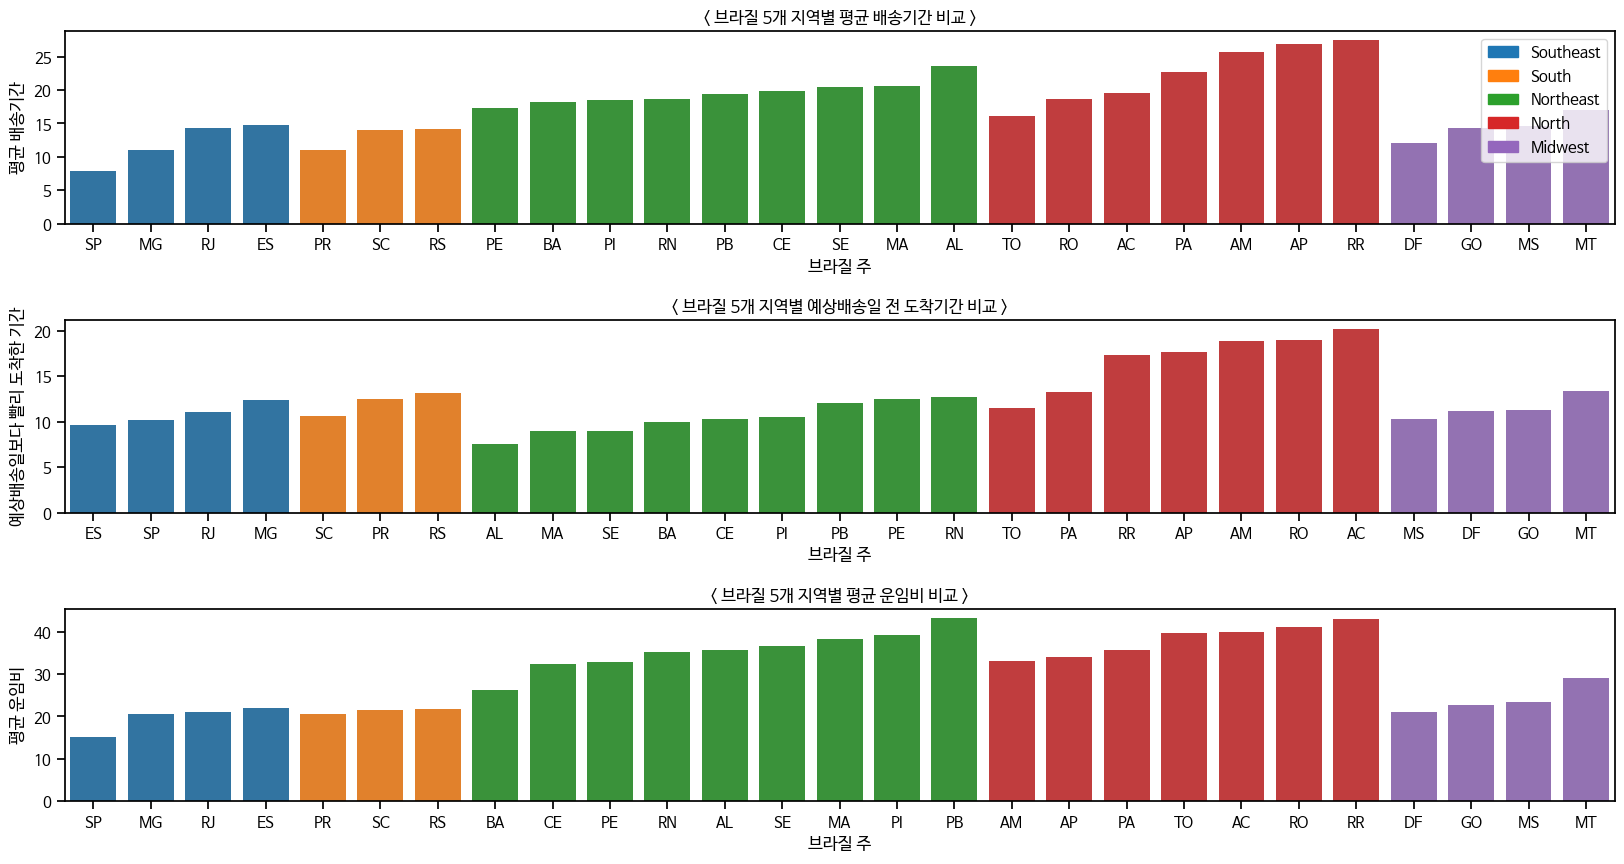

In [67]:
_, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,10)) # nrows=3, ncols=1

# 그래프 간 겹치지 않게 조절
_.subplots_adjust(hspace=0.5)

sns.barplot(
    data=df_deliver,
    x='브라질 주',
    y='평균배송기간',
    palette=col_palette,
    ax=axes[0])
axes[0].set_title('< 브라질 5개 지역별 평균 배송기간 비교 >')
axes[0].set_ylabel('평균 배송기간')


sns.barplot(
    data=df_arrival,
    x='브라질 주',
    y='예상배송일_전_도착(평균)',
    palette=col_palette,
    ax=axes[1])

axes[1].set_title('< 브라질 5개 지역별 예상배송일 전 도착기간 비교 >')
axes[1].set_ylabel('예상배송일보다 빨리 도착한 기간')

sns.barplot(
    data=df_freight,
    x='브라질 주',
    y='평균운임비',
    palette=col_palette,
    ax=axes[2])
axes[2].set_title('< 브라질 5개 지역별 평균 운임비 비교 >')
axes[2].set_ylabel('평균 운임비')

# 범례 나타내기
axes[0].legend(handles=[variable_1, variable_2, variable_3, variable_4, variable_5,],
          loc='upper right');

### 가설3-2. SP주는 (다른 주에 비해) 배송 거리가 짧을 것이다.
- SP주의 배송이 빠르고, 운임비가 저렴한 이유는, SP주에서 가까운 거리로의 배송이 주로 이루어지기 때문일 것이다.
- 즉, 배송 거리가 짧으면 그만큼 배송기간이 짧아지고, 짧은 배송 거리만큼 다른 주에 비해 배송비가 저렴할 것이다.

In [68]:
df_cp2.shape

(119143, 45)

In [69]:
df_cp2.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'cust_Region', 'seller_Region', '고객이 거주하는 주의 인구수',
       'approve_to_deliver', '예상보다얼

In [70]:
# 판매자 지역(배송지)을 기준으로 구매자 지역(도착지)으로의 배송 건수
state_cnt = df_cp2.groupby([
    'seller_Region', 'seller_state', 'cust_Region', 'customer_state'
    ])['customer_state'].count().to_frame('cnt').reset_index()

# state_cnt에서 seller_state와 customer_state가 같은 데이터만 추출
same_state = state_cnt[state_cnt['seller_state'] == state_cnt['customer_state']]
same_state = same_state.reset_index(drop=True)

# 주별 전체 주문 수
order_cnt = df_cp2.groupby(
    'seller_state')['order_id'].nunique().to_frame('전체 주문 수').reset_index()

# same_state 와 order_cnt 데이터 합치기
temp = same_state.merge(order_cnt, on="seller_state", how="left")

# 전체 주문 수 대비 판매자와 구매자 지역이 같은 주문 수 구하기
temp["ratio"] = temp["cnt"] / temp['전체 주문 수']
temp = temp.sort_values(by=['seller_Region', 'ratio'],
                 ascending=[False, False]).reset_index(drop=True)
temp

,seller_Region,seller_state,cust_Region,customer_state,cnt,전체 주문 수,ratio
0,Southeast,SP,Southeast,SP,37968,70188,0.540947
1,Southeast,RJ,Southeast,RJ,1167,4353,0.268091
2,Southeast,MG,Southeast,MG,1786,7930,0.225221
3,Southeast,ES,Southeast,ES,9,318,0.028302
4,South,RS,South,RS,334,1989,0.167924
5,South,PR,South,PR,855,7673,0.111430
6,South,SC,South,SC,319,3667,0.086992
7,Northeast,RN,Northeast,RN,24,51,0.470588
8,Northeast,BA,Northeast,BA,86,569,0.151142
9,Northeast,CE,Northeast,CE,9,91,0.098901


In [71]:
order_ratio = np.array(temp['ratio'])
display(order_ratio)

idx = np.array(temp['seller_state'])
display(idx)

# sudeste - Southeast - blue
# nordeste - Northeast - green
# norte - North - C3
# centro_oeste - Midwest - C4
# sul - South - orange
col_palette = ['tab:blue' if x in sudeste else 'tab:green'\
                      if x in nordeste else 'C3'\
                      if x in norte else 'C4'\
                      if x in centro_oeste else 'tab:orange'\
                      if x in sul else 'black' for x in idx]
col_palette

array([0.54094717, 0.26809097, 0.22522068, 0.02830189, 0.16792358,
       0.11142969, 0.08699209, 0.47058824, 0.15114236, 0.0989011 ,
       0.08333333, 0.0591133 , 0.03826531, 0.02777778, 0.08423326,
       0.07645631, 0.05109489])

array(['SP', 'RJ', 'MG', 'ES', 'RS', 'PR', 'SC', 'RN', 'BA', 'CE', 'PI',
       'PE', 'MA', 'PB', 'GO', 'DF', 'MT'], dtype=object)

['tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'C4',
 'C4',
 'C4']

- SP주는 SP주 내에서 배송이 이뤄지는 경우가 절반이 넘는다.
> - 판매자와 구매자가 같은 주 내에 있으면 배송기간과 운임비가 짧아진다. → 이것은 주문 횟수, 주문 고객 수, 총 매출에 영향을 미칠 것으로 예상 가능하다.

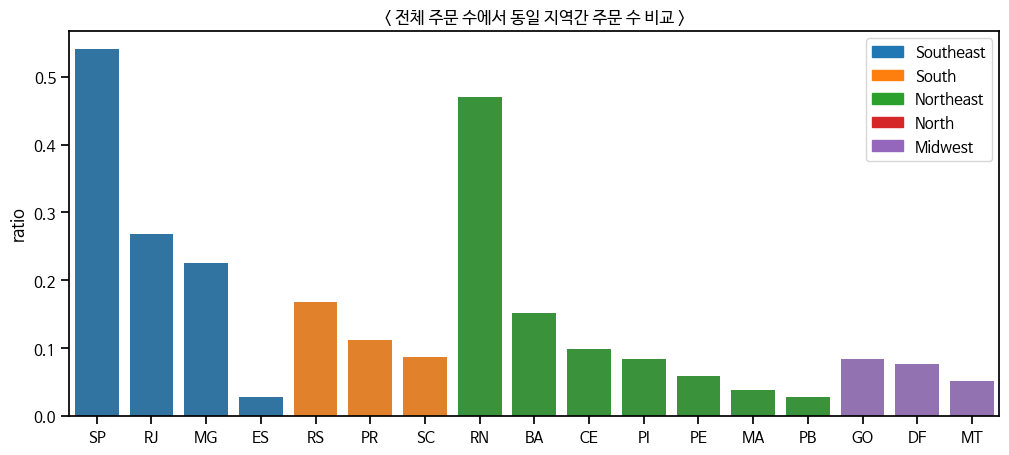

In [72]:
_, ax = plt.subplots(1, 1, figsize=(12, 5))

sns.barplot(x=idx, y=order_ratio, palette=col_palette,
            )

ax.set_title('< 전체 주문 수에서 동일 지역간 주문 수 비교 >')
ax.set_ylabel('ratio')

# 범례 나타내기
ax.legend(handles=[variable_1, variable_2, variable_3, variable_4, variable_5,],
          loc='upper right');

#### 실제 배송 거리를 확인

In [73]:
# display(df.shape, df.head(2))

In [74]:
# df_geo = df.copy()

In [150]:
# 지리정보 데이터 - zip_code_prefix 로 컬럼명 통일.
geolocation.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

# 중복행 제거.
geolocation = geolocation.drop_duplicates('zip_code_prefix')

# 고객 데이터 - customer_zip_code_prefix 컬럼명 변경.
customers.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

# 판매자 데이터 - seller_zip_code_prefix 컬럼명 변경.
sellers.rename(columns={'seller_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [151]:
# 고객 데이터와 지리정보 데이터 합치기.
df_c = customers.merge(geolocation, on='zip_code_prefix', how='left')

# 합친 데이터에 주문 데이터 합치기.
df_c = df_c.merge(orders, on='customer_id', how='outer')

In [152]:
# 판매자 데이터와 지리정보 데이터 합치기.
df_s = sellers.merge(geolocation, on='zip_code_prefix', how='left')

# 합친 데이터에 품목 데이터 합치기.
df_s = df_s.merge(order_items, on='seller_id', how='left')

In [153]:
# 합친 데이터에 제품 데이터 합치기.
df_s = df_s.merge(products, on='product_id', how='outer')

In [154]:
# 합친 데이터에 지불 데이터 합치기.
df_s = df_s.merge(order_payments, on='order_id', how='outer')

In [155]:
# df_c 데이터와 df_s 데이터 합치기.
df_cs = df_c.merge(df_s, on='order_id', how='outer')

# 컬럼명 변경.
df_cs.rename(columns={
    'geolocation_lat_x':'customer_lat',
    'geolocation_lng_x':'customer_lng',
    'geolocation_lat_y':'seller_lat',
    'geolocation_lng_y':'seller_lng'
    }, inplace=True)

In [156]:
# 지역(region) 데이터 넣기
# Seting regions
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

# customer
df_cs.loc[df_cs['customer_state'].isin(sudeste), 'cust_Region'] = 'Southeast'
df_cs.loc[df_cs['customer_state'].isin(nordeste), 'cust_Region'] = 'Northeast'
df_cs.loc[df_cs['customer_state'].isin(norte), 'cust_Region'] = 'North'
df_cs.loc[df_cs['customer_state'].isin(centro_oeste), 'cust_Region'] = 'Midwest'
df_cs.loc[df_cs['customer_state'].isin(sul), 'cust_Region'] = 'South'

# seller
df_cs.loc[df_cs['seller_state'].isin(sudeste), 'seller_Region'] = 'Southeast'
df_cs.loc[df_cs['seller_state'].isin(nordeste), 'seller_Region'] = 'Northeast'
df_cs.loc[df_cs['seller_state'].isin(norte), 'seller_Region'] = 'North'
df_cs.loc[df_cs['seller_state'].isin(centro_oeste), 'seller_Region'] = 'Midwest'
df_cs.loc[df_cs['seller_state'].isin(sul), 'seller_Region'] = 'South'

In [157]:
!pip install haversine

In [158]:
from haversine import haversine

In [159]:
# 하버사인 거리 구하기.
def distance(lat_s, lng_s, lat_b, lng_b):
    seller = (lat_s, lng_s)
    buyer = (lat_b, lng_b)
    return haversine(seller, buyer, unit = 'km')

In [160]:
df_distance = df_cs[['seller_lat','seller_lng','customer_lat','customer_lng']]

In [161]:
dis=[]
for i in range(df_cs.shape[0]):
    a,b,c,d = df_distance.loc[i]
    dis.append(round(distance(a,b,c,d),2))

In [162]:
# df_cs 데이터프레임에 distance 컬럼으로 값 넣기.
df_cs['distance'] = dis

In [163]:
# SP주에 거주하는 고객과 판매자와의 평균 배송거리는 약  247km이다.
df_cs.loc[df_cs['customer_state']=='SP', 'distance'].describe()

count    49454.000000
mean       248.228711
std        272.353556
min          0.000000
25%         47.890000
50%        164.870000
75%        367.537500
max       2716.470000
Name: distance, dtype: float64

In [164]:
# 거리에 따라 배송 시간이 단축된다?
df_cs['예상보다얼마나일찍'] = (pd.to_datetime(df_cs['order_estimated_delivery_date']) - \
                      pd.to_datetime(df_cs['order_delivered_customer_date'])).dt.days

- SP주는 고객 거주 지역(region) 및 주(state) 기준, 다른 지역보다 배송거리가 짧다.
- SP주는 판매자 거주 지역(region) 및 주(state) 기준, 다른 지역보다 배송거리가 짧다.

In [165]:
# 고객 지역(region)과 주(state) 기준으로 정렬하기.
df_cs_c = df_cs[['cust_Region','customer_state', 'price', 'freight_value', 'distance', '예상보다얼마나일찍']]
# df_cs_c.head()

temp_c = df_cs_c.groupby(['cust_Region','customer_state'])[[
    'price', 'freight_value', 'distance', '예상보다얼마나일찍']].apply('mean').reset_index()

# 정렬
temp_c = temp_c.sort_values(by=['cust_Region', 'customer_state', 'price', 'freight_value', 'distance', '예상보다얼마나일찍'],
                 ascending=[False, False, False, True, True, True]).reset_index(drop=True)
temp_c

,cust_Region,customer_state,price,freight_value,distance,예상보다얼마나일찍
0,Southeast,SP,109.913489,15.198202,248.228711,10.226319
1,Southeast,RJ,124.849231,21.100930,487.021593,11.032267
2,Southeast,MG,120.225607,20.626288,533.386905,12.357654
3,Southeast,ES,121.427686,21.981424,800.441359,9.591678
4,South,SC,125.108194,21.435695,573.163473,10.603599
5,South,RS,121.457066,21.828506,870.922594,13.189596
6,South,PR,118.392565,20.575258,490.827070,12.476653
7,Northeast,SE,153.538035,36.627935,1649.418384,9.025907
8,Northeast,RN,166.176714,35.279930,2100.064603,12.686275
9,Northeast,PI,160.851134,39.233229,1960.263333,10.473779


In [166]:
cust_d = np.array(temp_c['distance'])
display(cust_d)

idx = np.array(temp_c['customer_state'])
display(idx)

# sudeste - Southeast - blue
# nordeste - Northeast - green
# norte - North - C3
# centro_oeste - Midwest - C4
# sul - South - orange
col_palette = ['tab:blue' if x in sudeste else 'tab:green'\
                      if x in nordeste else 'C3'\
                      if x in norte else 'C4'\
                      if x in centro_oeste else 'tab:orange'\
                      if x in sul else 'black' for x in idx]
col_palette

array([ 248.22871133,  487.02159277,  533.38690474,  800.44135856,
        573.1634731 ,  870.92259437,  490.82707042, 1649.41838384,
       2100.06460317, 1960.26333333, 1973.57615711, 2097.90909953,
       2110.12328963, 2186.52902012, 1342.67550174, 1835.79811816,
       1447.79091988, 3248.88461538, 2231.05491166, 2294.61428571,
       2599.86595238, 2642.16385965, 2643.40138298, 1348.72975871,
        843.49384067,  774.62619205,  828.27465229])

array(['SP', 'RJ', 'MG', 'ES', 'SC', 'RS', 'PR', 'SE', 'RN', 'PI', 'PE',
       'PB', 'MA', 'CE', 'BA', 'AL', 'TO', 'RR', 'RO', 'PA', 'AP', 'AM',
       'AC', 'MT', 'MS', 'GO', 'DF'], dtype=object)

['tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C4',
 'C4',
 'C4',
 'C4']

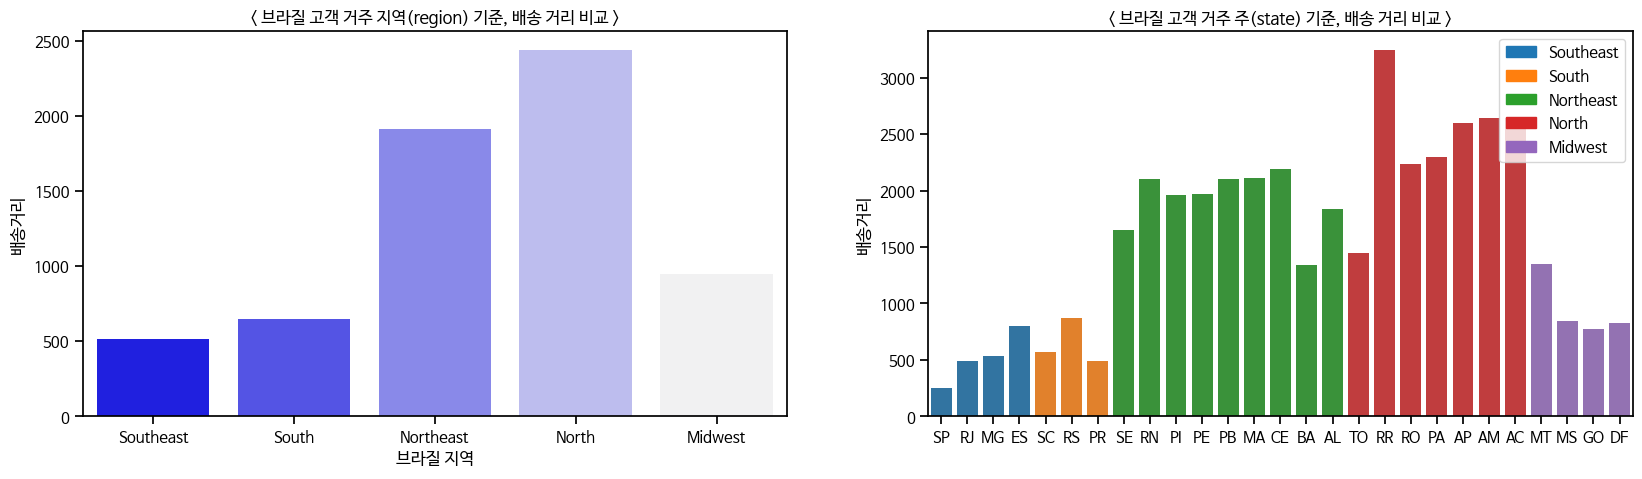

In [167]:
_, axes = plt.subplots(1, 2, figsize=(20, 5)) # nrows= 1, ncols=2

sns.barplot(
    data= temp_c,
    x='cust_Region',
    y='distance',
    palette='light:b_r',
    errorbar=None,
    ax=axes[0]
    )

axes[0].set_title('< 브라질 고객 거주 지역(region) 기준, 배송 거리 비교 >')
axes[0].set_xlabel('브라질 지역')
axes[0].set_ylabel('배송거리')

sns.barplot(x=idx, y=cust_d, palette=col_palette,
            ax=axes[1])

axes[1].set_title('< 브라질 고객 거주 주(state) 기준, 배송 거리 비교 >')
# axes[1].set_xlabel('브라질 주')
axes[1].set_ylabel('배송거리')

# 범례 나타내기
axes[1].legend(handles=[variable_1, variable_2, variable_3, variable_4, variable_5],
               loc='upper right');

In [168]:
# 판매자 지역(region)과 주(state) 기준으로 정렬하기.
df_cs_s = df_cs[['seller_Region','seller_state', 'price', 'freight_value', 'distance', '예상보다얼마나일찍']]
df_cs_s.head()

temp_s = df_cs_s.groupby(['seller_Region','seller_state'])[[
    'price', 'freight_value', 'distance', '예상보다얼마나일찍']].apply('mean').reset_index()

# 정렬
temp_s = temp_s.sort_values(by=['seller_Region','seller_state', 'price', 'freight_value', 'distance', '예상보다얼마나일찍'],
                 ascending=[False, False, False, True, True, True]).reset_index(drop=True)
temp_s

,seller_Region,seller_state,price,freight_value,distance,예상보다얼마나일찍
0,Southeast,SP,108.891496,18.486928,540.644474,10.302558
1,Southeast,RJ,173.239177,19.495928,578.855008,11.567712
2,Southeast,MG,114.373469,24.131429,603.931829,12.454515
3,Southeast,ES,126.143256,32.223359,803.230641,12.342932
4,South,SC,155.390272,26.173827,737.558241,13.294258
5,South,RS,171.593552,26.104380,1005.115305,15.438472
6,South,PR,146.974628,22.869160,720.166193,13.262105
7,Northeast,SE,160.620000,31.849000,1418.909000,16.300000
8,Northeast,RN,178.439286,23.287679,976.859643,12.482143
9,Northeast,PI,210.166667,36.943333,1422.881667,14.000000


In [169]:
seller_d = np.array(temp_s['distance'])
display(seller_d)

idx = np.array(temp_s['seller_state'])
display(idx)

# sudeste - Southeast - blue
# nordeste - Northeast - green
# norte - North - C3
# centro_oeste - Midwest - C4
# sul - South - orange
col_palette = ['tab:blue' if x in sudeste else 'tab:green'\
                      if x in nordeste else 'C3'\
                      if x in norte else 'C4'\
                      if x in centro_oeste else 'tab:orange'\
                      if x in sul else 'black' for x in idx]
col_palette

array([ 540.64447379,  578.855008  ,  603.93182948,  803.23064103,
        737.55824124, 1005.11530549,  720.16619344, 1418.909     ,
        976.85964286, 1422.88166667, 1579.93256466, 1330.62272727,
       1937.25272727, 1641.50921569, 1154.60525253, 2346.36357143,
        671.62      , 2326.97333333, 2716.47      , 1363.1470068 ,
       1165.97966102,  846.26321755,  842.30230343])

array(['SP', 'RJ', 'MG', 'ES', 'SC', 'RS', 'PR', 'SE', 'RN', 'PI', 'PE',
       'PB', 'MA', 'CE', 'BA', 'RO', 'PA', 'AM', 'AC', 'MT', 'MS', 'GO',
       'DF'], dtype=object)

['tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'C3',
 'C3',
 'C3',
 'C3',
 'C4',
 'C4',
 'C4',
 'C4']

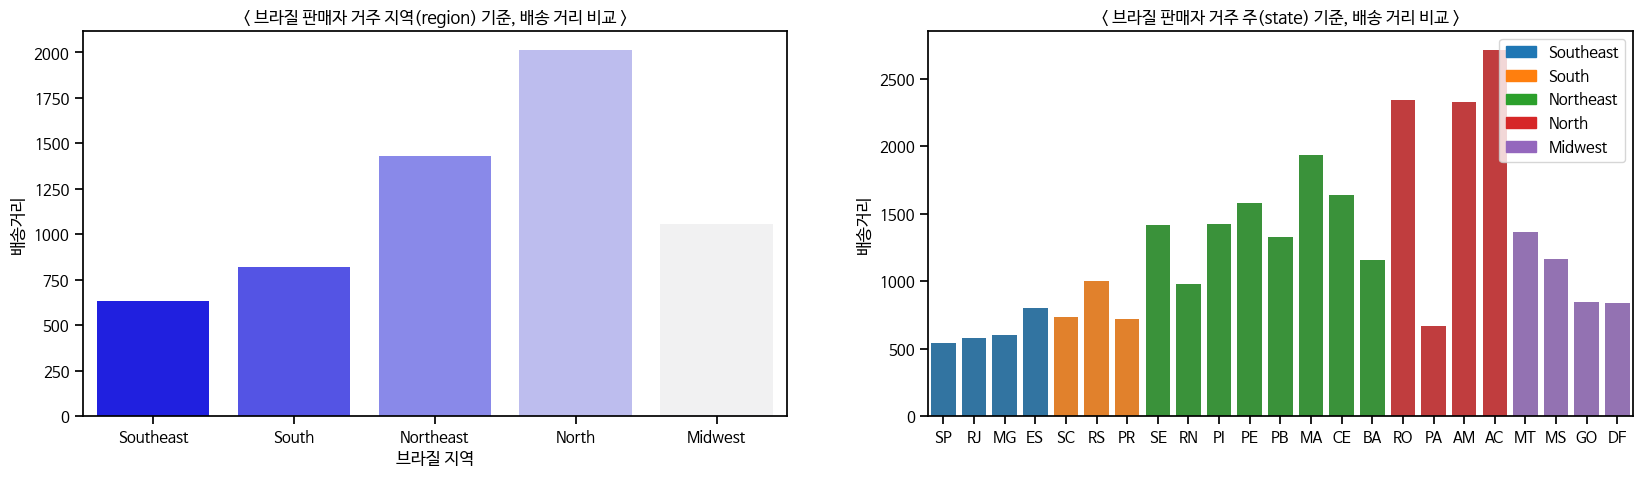

In [170]:
_, axes = plt.subplots(1, 2, figsize=(20, 5)) # nrows= 1, ncols=2

sns.barplot(
    data= temp_s,
    x='seller_Region',
    y='distance',
    palette='light:b_r',
    errorbar=None,
    ax=axes[0]
    )

axes[0].set_title('< 브라질 판매자 거주 지역(region) 기준, 배송 거리 비교 >')
axes[0].set_xlabel('브라질 지역')
axes[0].set_ylabel('배송거리')

sns.barplot(x=idx, y=seller_d, palette=col_palette,
            ax=axes[1])

axes[1].set_title('< 브라질 판매자 거주 주(state) 기준, 배송 거리 비교 >')
# axes[1].set_xlabel('브라질 주')
axes[1].set_ylabel('배송거리')

# 범례 나타내기
axes[1].legend(handles=[variable_1, variable_2, variable_3, variable_4, variable_5],
               loc='upper right');

#### 배송 거리와 배송 시간의 관계 확인

- 가격과 배송료, 배송료와 거리는 상관관계가 있음을 확인했다.

In [172]:
cols = ['price', 'freight_value', 'distance', '예상보다얼마나일찍']
corr = df_cs[cols].corr(method = 'pearson')

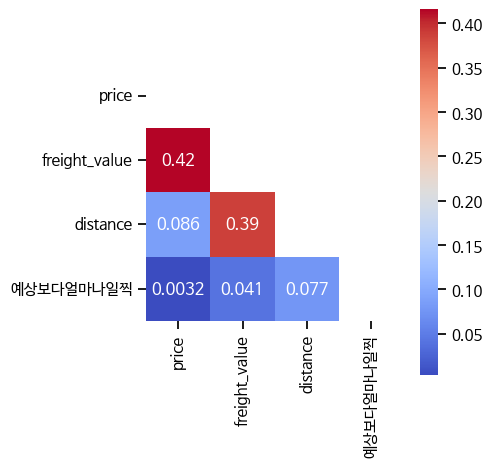

In [173]:
# 가격(price)과 배송료(freight_value)는 뚜렷한 양적 상관관계.
# 배송료(freight_value)와 거리(distance)도 뚜렷한 양적 상관관계.

mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap = "coolwarm",
            annot=True, # 상관계수를 표시
            square=True, # 정사각형으로
            mask = mask)
plt.tight_layout();

## ② Southeast 지역 다음으로, South 지역이 활성화된 시장이다.
- South 지역 중에서도 유망한 주(state)와 도시를 찾아보자.
> - 앞에서 그렸던 3개의 그래프를 살펴보면, South 지역에서는 RS주가 가장 높은 결과값을 나타내는 것을 알 수 있다. (고객 수, 판매자 수, 매출 기준)

- 그래서 RS주를 새로운 타겟 시장으로 삼고, 유망 도시와 물품을 찾아보자.

In [179]:
df_cs.head()

,customer_id,customer_unique_id,zip_code_prefix_x,customer_city,customer_state,customer_lat,customer_lng,geolocation_city_x,geolocation_state_x,order_id,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,cust_Region,seller_Region,distance,예상보다얼마나일찍
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,...,64.0,31.0,1.0,credit_card,2.0,146.87,Southeast,Southeast,346.98,10.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,...,15.0,40.0,1.0,credit_card,8.0,335.48,Southeast,South,413.95,7.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,...,52.0,17.0,1.0,credit_card,7.0,157.73,Southeast,Southeast,29.57,-2.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,...,51.0,28.0,1.0,credit_card,1.0,173.30,Southeast,Southeast,19.35,12.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,...,15.0,35.0,1.0,credit_card,8.0,252.25,Southeast,Southeast,219.73,5.0


In [180]:
df_cs = df_cs.drop(columns = ['shipping_limit_date', 'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'])

In [181]:
# 카테고리 영어 데이터 붙이기.
df_new = df_cs.merge(product_category_name, on = "product_category_name", how = 'outer')
display(df_new.shape, df_new.head(2))

(118434, 39)

,customer_id,customer_unique_id,zip_code_prefix_x,customer_city,customer_state,customer_lat,customer_lng,geolocation_city_x,geolocation_state_x,order_id,...,product_name_lenght,payment_sequential,payment_type,payment_installments,payment_value,cust_Region,seller_Region,distance,예상보다얼마나일찍,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,...,41.0,1.0,credit_card,2.0,146.87,Southeast,Southeast,346.98,10.0,office_furniture
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,...,55.0,1.0,credit_card,7.0,157.73,Southeast,Southeast,29.57,-2.0,office_furniture


### 판매건수, 총 매출, 단가 기준으로 확인


- 취급하는 물품의 카테고리 수

In [182]:
df_new["product_category_name_english"].nunique()

71

- 가장 많이 팔리는 상품의 카테고리?

In [186]:
# 판매건수, 총 매출, 단가 중
# 판매건수 높은 순
df_new.groupby(by = 'product_category_name_english').agg(
    {'order_id':'nunique',
     'payment_value':'sum',
     'price':'mean'}).sort_values(by = 'order_id', ascending = False).reset_index()[:11]

,product_category_name_english,order_id,payment_value,price
0,bed_bath_table,9417,1712553.67,92.408950
1,health_beauty,8836,1657373.12,130.074263
2,sports_leisure,7720,1392127.56,114.476952
3,computers_accessories,6689,1585330.45,116.589652
4,furniture_decor,6449,1430176.39,87.499301
5,housewares,5884,1094758.13,90.630455
6,watches_gifts,5624,1429216.68,202.087292
7,telephony,4199,486882.05,71.891370
8,auto,3897,852294.33,140.843231
9,toys,3886,619037.69,117.082867


In [187]:
# 판매건수, 총 매출, 단가 중
# 매출 높은 순

df_new.groupby(by = 'product_category_name_english').agg(
    {'order_id':'nunique',
     'payment_value':'sum',
     'price':'mean'}).sort_values(by = 'payment_value', ascending = False).reset_index()[:11]

,product_category_name_english,order_id,payment_value,price
0,bed_bath_table,9417,1712553.67,92.408950
1,health_beauty,8836,1657373.12,130.074263
2,computers_accessories,6689,1585330.45,116.589652
3,furniture_decor,6449,1430176.39,87.499301
4,watches_gifts,5624,1429216.68,202.087292
5,sports_leisure,7720,1392127.56,114.476952
6,housewares,5884,1094758.13,90.630455
7,auto,3897,852294.33,140.843231
8,garden_tools,3518,838280.75,113.296358
9,cool_stuff,3632,779698.00,166.117254


In [188]:
# 판매건수, 총 매출, 단가 중
# 단가 비싼 순

df_new.groupby(by = 'product_category_name_english').agg(
    {'order_id':'nunique',
     'payment_value':'sum',
     'price':'mean'}).sort_values(by = 'price', ascending = False).reset_index()[:11]

,product_category_name_english,order_id,payment_value,price
0,computers,181,279121.55,1103.689136
1,small_appliances_home_oven_and_coffee,75,51229.32,627.509103
2,home_appliances_2,234,124563.46,459.945187
3,agro_industry_and_commerce,182,118730.61,332.706151
4,musical_instruments,628,233074.12,293.772604
5,small_appliances,630,225584.38,286.614351
6,fixed_telephony,217,207010.26,227.679926
7,construction_tools_safety,167,65691.03,210.942261
8,watches_gifts,5624,1429216.68,202.087292
9,air_conditioning,253,91170.66,185.305894


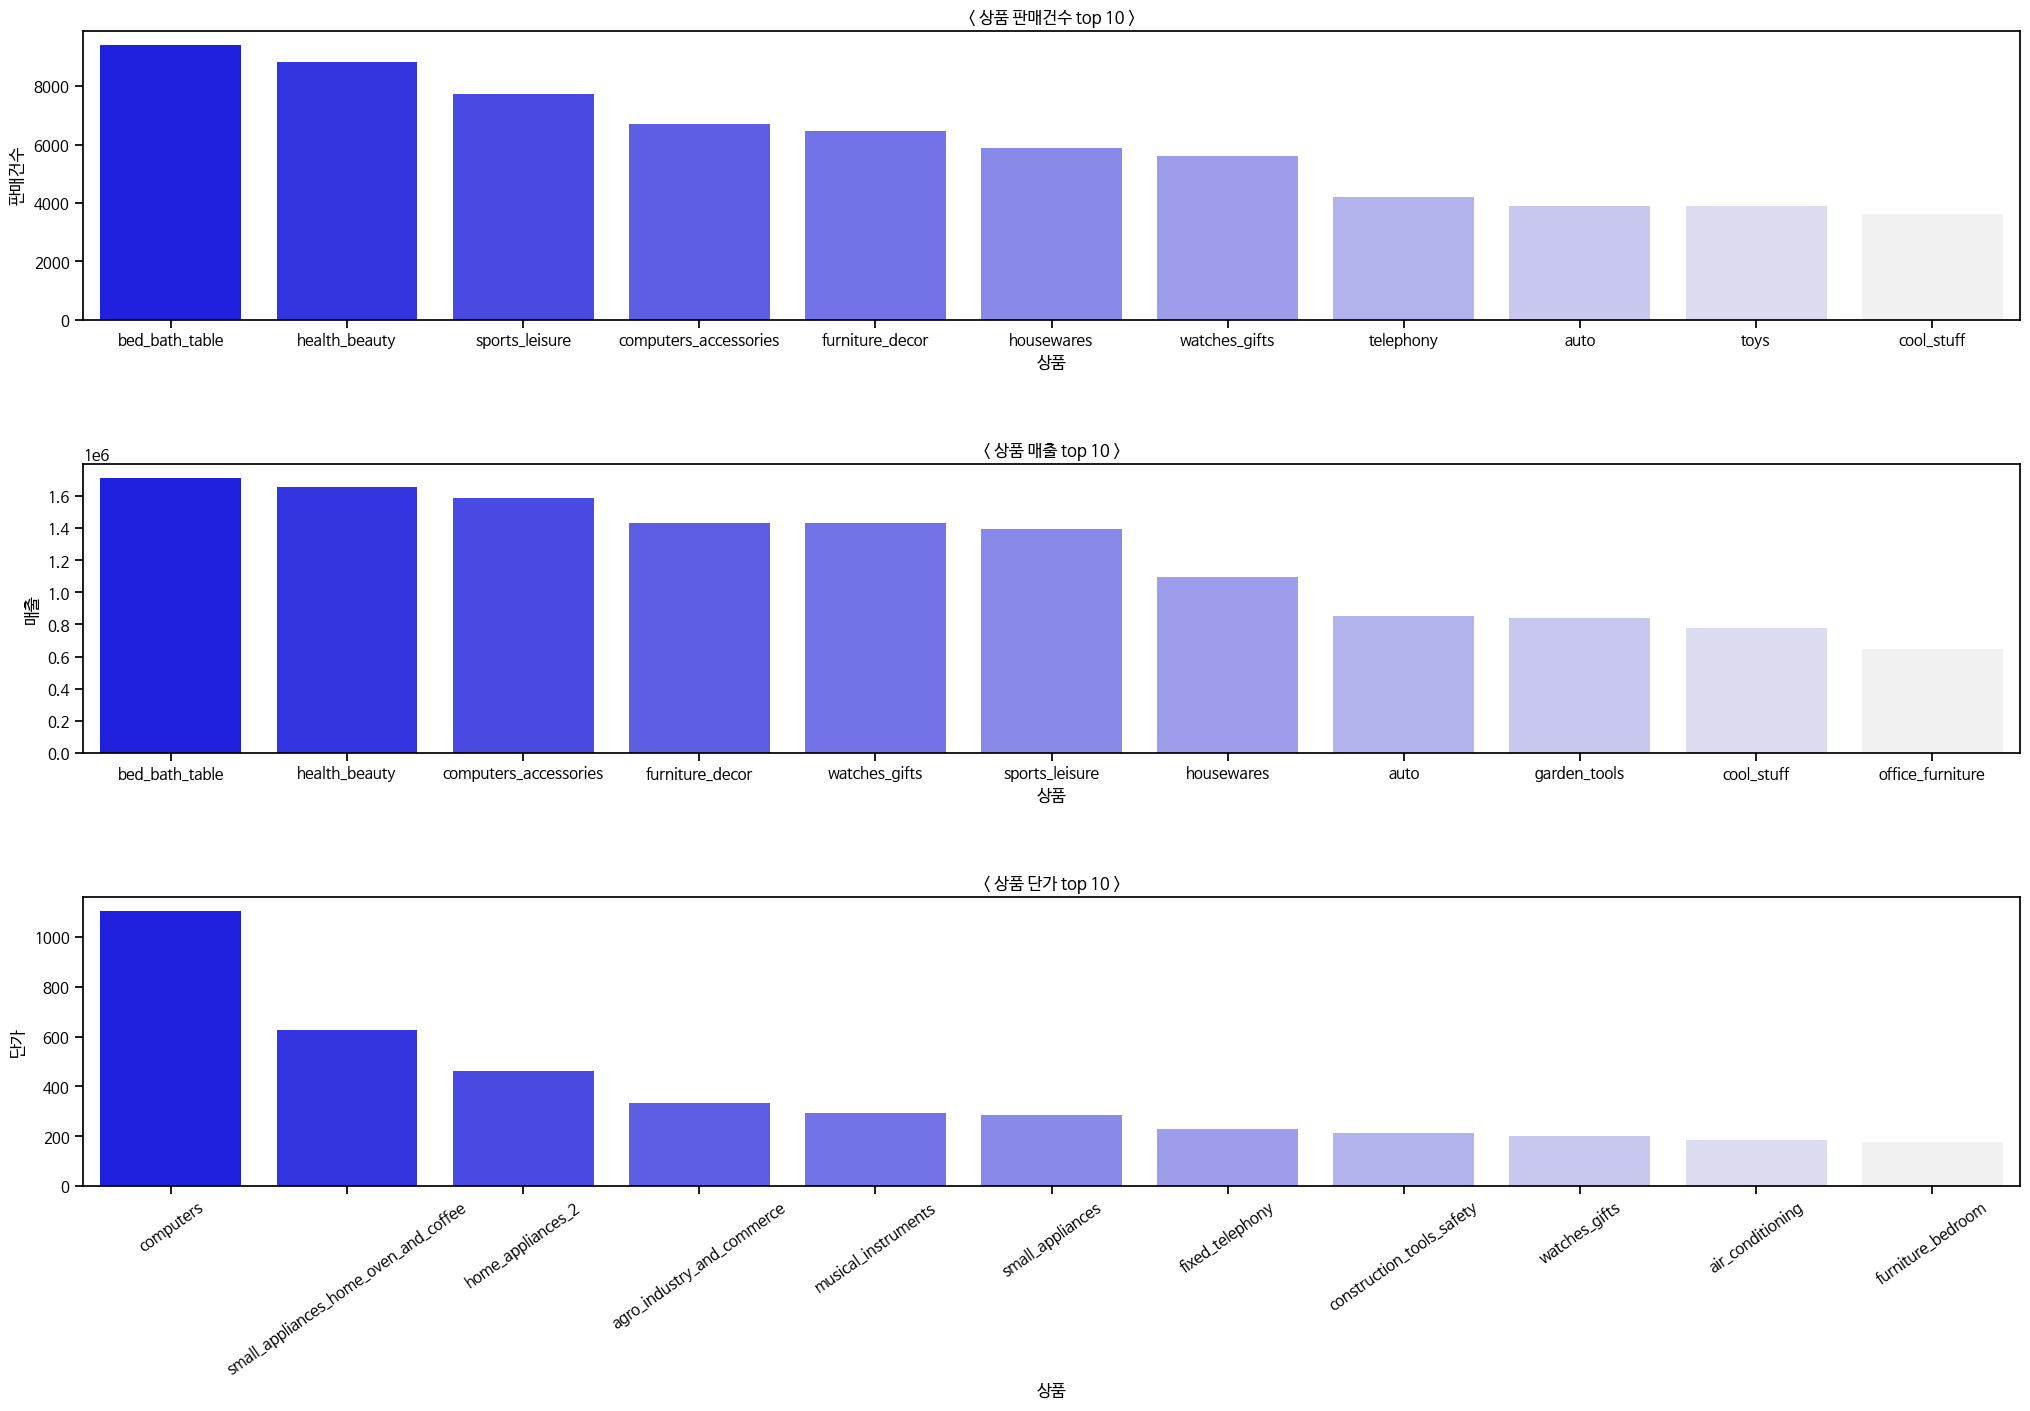

In [196]:
_, axes = plt.subplots(3, 1, figsize=(25, 15)) # nrows=3, ncols=1

# 그래프 간 겹치지 않게 조절
_.subplots_adjust(hspace=0.5)

sns.barplot(
    data= df_new.groupby(by = 'product_category_name_english').agg(
        {'order_id':'nunique', 'payment_value':'sum', 'price':'mean'}).sort_values(
        by = 'order_id', ascending = False).reset_index()[:11],
    x='product_category_name_english',
    y='order_id',
    palette='light:b_r',
    ax=axes[0]
)
axes[0].set_title('< 상품 판매건수 top 10 >')
axes[0].set_xlabel('상품')
axes[0].set_ylabel('판매건수')

sns.barplot(
    data=df_new.groupby(by = 'product_category_name_english').agg(
        {'order_id':'nunique', 'payment_value':'sum', 'price':'mean'}).sort_values(
        by = 'payment_value', ascending = False).reset_index()[:11],
    x='product_category_name_english',
    y='payment_value',
    palette='light:b_r',
    ax=axes[1]
)
axes[1].set_title('< 상품 매출 top 10 >')
axes[1].set_xlabel('상품')
axes[1].set_ylabel('매출')

sns.barplot(
    data=df_new.groupby(by = 'product_category_name_english').agg(
        {'order_id':'nunique', 'payment_value':'sum', 'price':'mean'}).sort_values(
        by = 'price', ascending = False).reset_index()[:11],
    x='product_category_name_english',
    y='price',
    palette='light:b_r',
    ax=axes[2]
)
axes[2].set_title('< 상품 단가 top 10 >')
axes[2].set_xlabel('상품')
axes[2].set_ylabel('단가')
plt.xticks(rotation=35);

### 고객의 구매 빈도수

In [204]:
customer_freq = df_new.groupby(by = "customer_unique_id")["order_id"].nunique()

In [202]:
customer_freq.value_counts().to_frame('구매 빈도수').reset_index()

,index,구매 빈도수
0,1,93099
1,2,2745
2,3,203
3,4,30
4,5,8
5,6,6
6,7,3
7,9,1
8,17,1


In [205]:
order_count = customer_freq.reset_index()
order_count = order_count.rename(columns = {"order_id":"order_count"})
df_new2 = pd.merge(df_new, order_count, on = "customer_unique_id")
df_new2.head()

,customer_id,customer_unique_id,zip_code_prefix_x,customer_city,customer_state,customer_lat,customer_lng,geolocation_city_x,geolocation_state_x,order_id,...,payment_sequential,payment_type,payment_installments,payment_value,cust_Region,seller_Region,distance,예상보다얼마나일찍,product_category_name_english,order_count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,...,1.0,credit_card,2.0,146.87,Southeast,Southeast,346.98,10.0,office_furniture,1
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,...,1.0,credit_card,7.0,157.73,Southeast,Southeast,29.57,-2.0,office_furniture,1
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,...,1.0,credit_card,1.0,173.30,Southeast,Southeast,19.35,12.0,office_furniture,1
3,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,-2.508543,-44.303020,sao luis,MA,997fd4b37386d10b57d4ac8cdec011a6,...,1.0,credit_card,6.0,315.75,Northeast,Southeast,2342.85,7.0,office_furniture,1
4,8276de07ef25225d412b8462d73f8664,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,-30.032150,-51.232552,porto alegre,RS,b63fff1ef8b6201df68bb611ee41129e,...,1.0,boleto,1.0,146.21,South,Southeast,873.25,5.0,office_furniture,1


### 고객의 구매 빈도수별 평균 매출액

In [208]:
df_new2.groupby(by = "order_count")["payment_value"].mean().to_frame('평균 매출액').reset_index()

,order_count,평균 매출액
0,1,173.234403
1,2,163.657892
2,3,178.638799
3,4,306.043605
4,5,153.252826
5,6,139.308085
6,7,144.711935
7,9,140.255714
8,17,54.566471


- 1번 구매한 고객들의 수가 많으며, 평균 매출액은 4번 구매한 고객들이 제일 높다.

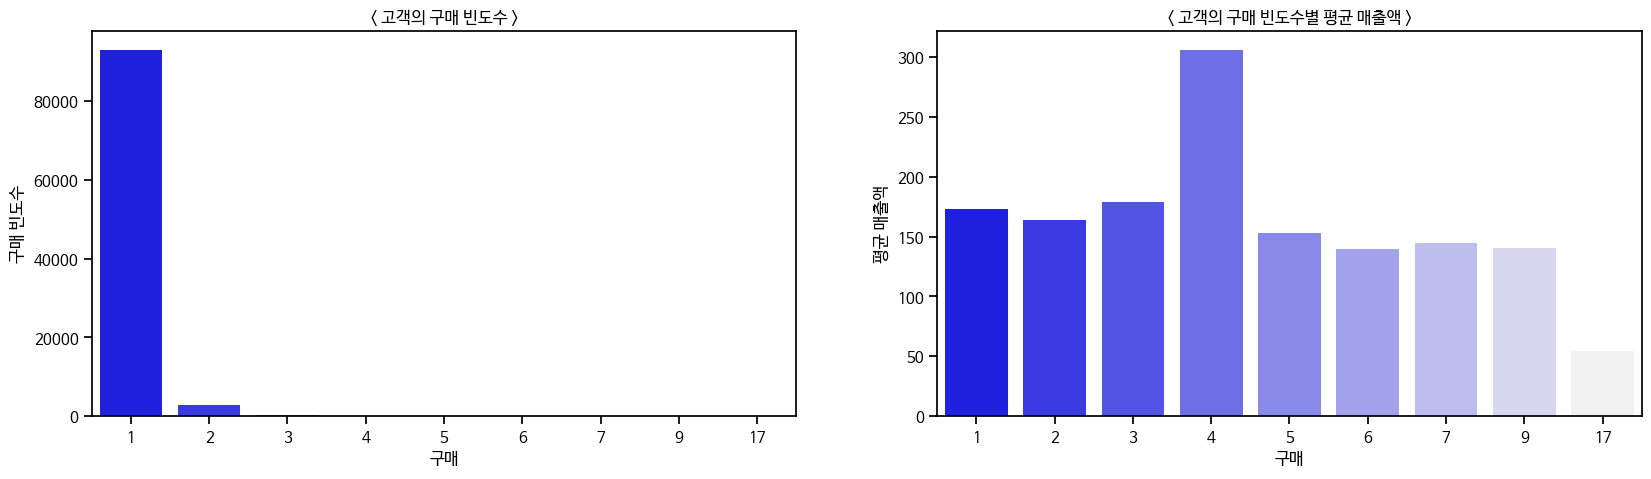

In [209]:
_, axes = plt.subplots(1, 2, figsize=(20, 5))  # nrows=1, ncols=2

sns.barplot(
    data=customer_freq.value_counts().to_frame('구매 빈도수').reset_index(),
    x='index',
    y='구매 빈도수',
    palette='light:b_r',
    ax=axes[0],
    )

axes[0].set_title('< 고객의 구매 빈도수 >')
axes[0].set_xlabel('구매')
axes[0].set_ylabel('구매 빈도수')

sns.barplot(
    data=df_new2.groupby(by = "order_count")["payment_value"].mean().to_frame(
        '평균 매출액').reset_index(),
    x='order_count',
    y='평균 매출액',
    palette='light:b_r',
    ax=axes[1])

axes[1].set_title('< 고객의 구매 빈도수별 평균 매출액 >')
axes[1].set_xlabel('구매')
axes[1].set_ylabel('평균 매출액');

### 고객의 구매 빈도수별 구매 물품

In [210]:
# 한 번 구매한 고객들이 다시는 사지 않는 것
set(df_new2[df_new2["order_count"]==1]["product_category_name_english"].unique()) - \
set(df_new2[df_new2["order_count"]==2]["product_category_name_english"].unique()) - \
set(df_new2[df_new2["order_count"]==3]["product_category_name_english"].unique()) - \
set(df_new2[df_new2["order_count"]==4]["product_category_name_english"].unique()) - \
set(df_new2[df_new2["order_count"]==5]["product_category_name_english"].unique()) - \
set(df_new2[df_new2["order_count"]==6]["product_category_name_english"].unique()) - \
set(df_new2[df_new2["order_count"]==7]["product_category_name_english"].unique()) - \
set(df_new2[df_new2["order_count"]==9]["product_category_name_english"].unique()) - \
set(df_new2[df_new2["order_count"]==17]["product_category_name_english"].unique())

{'cds_dvds_musicals', 'flowers', 'security_and_services'}

In [211]:
# 4번구매한 고객들이 주로 사는 물품
df_new2[df_new2["order_count"]==4]["product_category_name_english"].unique()

array(['housewares', nan, 'pet_shop', 'telephony', 'garden_tools',
       'perfumery', 'sports_leisure', 'baby', 'stationery',
       'bed_bath_table', 'health_beauty', 'fashio_female_clothing',
       'drinks', 'la_cuisine', 'computers_accessories', 'toys',
       'watches_gifts', 'fashion_bags_accessories', 'furniture_decor',
       'luggage_accessories', 'food', 'furniture_living_room', 'auto',
       'furniture_bedroom', 'consoles_games', 'fashion_shoes',
       'dvds_blu_ray', 'home_appliances_2'], dtype=object)

### South 지역에서 추천 제품 및 도시 선정

In [213]:
df_new2.columns

Index(['customer_id', 'customer_unique_id', 'zip_code_prefix_x',
       'customer_city', 'customer_state', 'customer_lat', 'customer_lng',
       'geolocation_city_x', 'geolocation_state_x', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'seller_id', 'zip_code_prefix_y',
       'seller_city', 'seller_state', 'seller_lat', 'seller_lng',
       'geolocation_city_y', 'geolocation_state_y', 'order_item_id',
       'product_id', 'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'cust_Region', 'seller_Region',
       'distance', '예상보다얼마나일찍', 'product_category_name_english',
       'order_count'],
      dtype='object')

In [259]:
# south 지역에 사는 고객들이 다른 지역에서 구매한 물품별 건수를 고객 지역으로 groupby
south_c_buy = df_new2[(df_new2['cust_Region'] == 'South') &
                          (df_new2['seller_Region'].isin(['Northeast','North','Midwest','Southeast'])
                         )].groupby(['customer_state'])['order_id'].nunique()
south_c_buy

customer_state
PR    3852
RS    4270
SC    2841
Name: order_id, dtype: int64

In [260]:
# south 지역 판매자들의 seller_id
south_seller_id = df_new2.loc[df_new2['seller_Region'] =='South', 'seller_id'].values

In [262]:
len(south_seller_id)

15557

In [263]:
# south 지역 판매자들의 수
south_seller_state = df_new2[df_new2['seller_id'].isin(south_seller_id)].groupby(
    'seller_state')['seller_id'].nunique()
south_seller_state

seller_state
PR    349
RS    129
SC    190
Name: seller_id, dtype: int64

In [267]:
# south 지역 고객들과 판매자들을 concat
south_cs = pd.concat([south_c_buy, south_seller_state], axis=1)
south_cs.columns=['주문 건수','seller 수']
# south_cs = south_cs.fillna(0)
south_cs

,주문 건수,seller 수
PR,3852,349
RS,4270,129
SC,2841,190


- 셀러 1인당 주문 건수가 많은 RS주 선정.

In [268]:
# 구매 건수 / seller 수
south_cs['seller 1인당 주문 건수'] = south_cs['주문 건수'] / south_cs['seller 수']
south_cs.sort_values(by=['seller 1인당 주문 건수', '주문 건수'], ascending=False, inplace=True)
south_cs

,주문 건수,seller 수,seller 1인당 주문 건수
RS,4270,129,33.100775
SC,2841,190,14.952632
PR,3852,349,11.037249


### RS주에서 추천 제품 및 도시 선정

In [311]:
# RS 주에 사는 고객들이 RS 주를 제외한 다른 주에서 구매한 물품별 건수를 RS 주로 groupby
rs_c_buy = df_new2[(df_new2['customer_state'] == 'RS') & (df_new2['seller_state']!='RS')
                    ].groupby('product_category_name_english')['order_id'].nunique().sort_values(ascending=False)
rs_c_buy

product_category_name_english
bed_bath_table            534
furniture_decor           432
sports_leisure            405
health_beauty             381
computers_accessories     332
                         ... 
furniture_bedroom           2
fashion_sport               2
tablets_printing_image      1
home_comfort_2              1
music                       1
Name: order_id, Length: 65, dtype: int64

In [312]:
# RS주 판매자들의 seller_id
rs_seller_id = df_new2.loc[df_new2['seller_state'] =='RS', 'seller_id'].values
rs_seller_id

array(['77dcbb67ccb3659bd58eaf5661560a30',
       '77dcbb67ccb3659bd58eaf5661560a30',
       'b1ac6ea7895bc3dd6f0f6f4abbdd2821', ...,
       '78ef7e885d17f35e2382a47aae8b8cce',
       '04ee0ec01589969663ba5967c0e0bdc0',
       'd98eec89afa3380e14463da2aabaea72'], dtype=object)

In [313]:
# RS주 판매자들의 수
rs_s_item = df_new2[df_new2['seller_id'].isin(rs_seller_id)].groupby(
    'product_category_name_english')['seller_id'].nunique()
rs_s_item

product_category_name_english
agro_industry_and_commerce                  3
air_conditioning                            4
art                                         1
arts_and_craftmanship                       1
auto                                       10
baby                                        7
bed_bath_table                              8
books_technical                             1
computers_accessories                      12
consoles_games                              3
construction_tools_construction             4
construction_tools_lights                   3
construction_tools_safety                   4
cool_stuff                                 10
costruction_tools_garden                    3
drinks                                      5
electronics                                 7
fashio_female_clothing                      1
fashion_bags_accessories                    5
fashion_childrens_clothes                   1
fixed_telephony                             2
food

In [314]:
# RS주 고객들이 다른 주에서 구매한 물품 수와 RS주 셀러들이 판매하는 물품 수 concat
rs_cs = pd.concat([rs_c_buy, rs_s_item], axis=1)
rs_cs.columns=['주문 건수','seller 수']
# rs_cs = rs_cs.fillna(0)
rs_cs = rs_cs.dropna()
rs_cs

,주문 건수,seller 수
product_category_name_english,,
bed_bath_table,534.0,8.0
furniture_decor,432.0,13.0
sports_leisure,405.0,16.0
health_beauty,381.0,24.0
computers_accessories,332.0,12.0
housewares,307.0,20.0
telephony,252.0,4.0
cool_stuff,230.0,10.0
garden_tools,228.0,8.0


- RS주 고객들이 RS주를 제외한 다른 주에서 구매한 물품별 주문 건수의 상위 17개 조회

In [323]:
rs_cs['seller 1인당 주문 건수'] = rs_cs['주문 건수'] / rs_cs['seller 수']
rs_cs = rs_cs.sort_values(by='seller 1인당 주문 건수', ascending= False)
rs_c_top17 = rs_cs[:17]
rs_c_top17

,주문 건수,seller 수,seller 1인당 주문 건수
product_category_name_english,,,
watches_gifts,227.0,1.0,227.000000
bed_bath_table,534.0,8.0,66.750000
telephony,252.0,4.0,63.000000
office_furniture,56.0,1.0,56.000000
toys,189.0,5.0,37.800000
perfumery,146.0,4.0,36.500000
furniture_decor,432.0,13.0,33.230769
garden_tools,228.0,8.0,28.500000
computers_accessories,332.0,12.0,27.666667


- 확인 과정
> 위 결과값과 결과값이 다르게 나오지만, 1위 상품은 여전히 `watches_gift` 로 나온다.

In [319]:
# RS 주에 사는 고객들이 RS 주를 제외한 다른 곳에서 구매한 물품별 건수를
# RS 주로 groupby 후 상위 14개 선택
top14_test = df_new2[(df_new2['customer_state'] == 'RS') & (df_new2['seller_state'] != 'RS')].groupby(
    'product_category_name_english')['order_id'].nunique().sort_values(ascending=False).nlargest(14)
top14_test

product_category_name_english
bed_bath_table           534
furniture_decor          432
sports_leisure           405
health_beauty            381
computers_accessories    332
housewares               307
telephony                252
cool_stuff               230
garden_tools             228
watches_gifts            227
toys                     189
baby                     189
auto                     172
electronics              149
Name: order_id, dtype: int64

In [320]:
pd.concat([top14_test, rs_cs], axis=1).dropna().sort_values('seller 1인당 주문 건수', ascending=False)

,order_id,주문 건수,seller 수,seller 1인당 주문 건수
product_category_name_english,,,,
watches_gifts,227.0,227.0,1.0,227.000000
bed_bath_table,534.0,534.0,8.0,66.750000
telephony,252.0,252.0,4.0,63.000000
toys,189.0,189.0,5.0,37.800000
furniture_decor,432.0,432.0,13.0,33.230769
garden_tools,228.0,228.0,8.0,28.500000
computers_accessories,332.0,332.0,12.0,27.666667
baby,189.0,189.0,7.0,27.000000
sports_leisure,405.0,405.0,16.0,25.312500


### watches_gifts를 가장 많이 구매한 도시 top3 찾기


In [322]:
df_new2.loc[(df_new2['customer_state']=='RS') & (df_new2['product_category_name_english']=='watches_gifts'),
            'customer_city'].value_counts()[:3]

porto alegre    70
pelotas         14
canoas          11
Name: customer_city, dtype: int64